# <span style="color:rgb(145, 255, 172);">Data Cleaning</span>

## Importing necessary libraries

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset_invade.csv file

In [127]:
df = pd.read_csv("dataset_invade.csv")

## Inspecting dataset: Viewing first 10 rows

In [128]:
pd.set_option('display.max_columns', None)
first_ten_rows = df.head(10)
first_ten_rows

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,logged_in,num_compromised,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,No
1,0,udp,other,SF,146,0,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,No
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,Yes
3,0,tcp,http,SF,232,8153,0,0,0,0,1,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,1.00,0.00,No
4,0,tcp,http,SF,199,420,0,0,0,0,1,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,No
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,121,19,0.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,Yes
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,166,9,1.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,Yes
7,0,tcp,private,S0,0,0,0,0,0,0,0,0,117,16,1.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,Yes
8,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,270,23,1.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,Yes
9,0,tcp,private,S0,0,0,0,0,0,0,0,0,133,8,1.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,Yes


## Inspecting dataset: Determine data types and missing values

In [129]:
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                148517 non-null  int64  
 1   protocol_type           148517 non-null  object 
 2   service                 148517 non-null  object 
 3   flag                    148517 non-null  object 
 4   src_bytes               148517 non-null  int64  
 5   dst_bytes               148517 non-null  int64  
 6   land                    148517 non-null  int64  
 7   wrong_fragment          148517 non-null  int64  
 8   urgent                  148517 non-null  int64  
 9   hot                     148517 non-null  int64  
 10  logged_in               148517 non-null  int64  
 11  num_compromised         148517 non-null  int64  
 12  count                   148517 non-null  int64  
 13  srv_count               148517 non-null  int64  
 14  serror_rate         

## Inspecting dataset: Summary statistics

In [130]:
stats = df.describe().transpose()
stats

,count,mean,std,min,25%,50%,75%,max
duration,148517.0,276.779305,2.460683e+03,0.0,0.00,0.00,0.00,5.771500e+04
src_bytes,148517.0,40227.949299,5.409612e+06,0.0,0.00,44.00,278.00,1.379964e+09
dst_bytes,148517.0,17088.853593,3.703525e+06,0.0,0.00,0.00,571.00,1.309937e+09
land,148517.0,0.000215,1.467714e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,148517.0,0.020523,2.400691e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,148517.0,0.000202,1.941708e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,148517.0,0.189379,2.013160e+00,0.0,0.00,0.00,0.00,1.010000e+02
logged_in,148517.0,0.402789,4.904606e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,148517.0,0.255062,2.223137e+01,0.0,0.00,0.00,0.00,7.479000e+03
count,148517.0,83.336561,1.167607e+02,0.0,2.00,13.00,141.00,5.110000e+02


## Checking for missing values

In [131]:
df.isnull().sum()

duration                  0
protocol_type             0
service                   0
flag                      0
src_bytes                 0
dst_bytes                 0
land                      0
wrong_fragment            0
urgent                    0
hot                       0
logged_in                 0
num_compromised           0
count                     0
srv_count                 0
serror_rate               0
rerror_rate               0
same_srv_rate             0
diff_srv_rate             0
srv_diff_host_rate        0
dst_host_count            0
dst_host_srv_count        0
dst_host_same_srv_rate    0
dst_host_diff_srv_rate    0
attack                    0
dtype: int64

## Dropping Logged_in column

In [132]:
df = df.drop(['logged_in'], axis = 1)

## Identifying duplicated columns and removing them

In [133]:
duplicate = df.duplicated().value_counts()
df.drop_duplicates()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_compromised,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,No
1,0,udp,other,SF,146,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,No
2,0,tcp,private,S0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,Yes
3,0,tcp,http,SF,232,8153,0,0,0,0,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,1.00,0.00,No
4,0,tcp,http,SF,199,420,0,0,0,0,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,1,tcp,smtp,SF,2599,293,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,255,186,0.73,0.13,Yes
148512,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,1,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,No
148513,0,tcp,http,SF,317,938,0,0,0,0,0,2,11,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,No
148514,0,tcp,http,SF,54540,8314,0,0,0,2,1,5,10,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,Yes


## One Hot Encoding for protocol_type, service & flag columns

In [134]:
#use df_encoded to train and test machine
df_encoded = pd.get_dummies(df, columns=['protocol_type', 'service', 'flag'])
df_encoded

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_compromised,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,attack,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,No,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,146,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,No,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,Yes,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,0,232,8153,0,0,0,0,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,1.00,0.00,No,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,0,199,420,0,0,0,0,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,No,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,Fals

# <span style="color:rgb(145, 255, 172);">Data Exploration (EDA)</span>

## Grouped Statistical Summaries

In [135]:
df_numeric = df.select_dtypes(include=[int,float])
df_numeric['attack'] = df['attack']
df_numeric.groupby('attack').mean()  # Mean values

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_compromised,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate
attack,,,,,,,,,,,,,,,,,,,
No,153.272536,11797.028538,4308.945895,0.000091,0.001635,0.00013,0.208062,0.467023,24.403509,29.341098,0.012148,0.039677,0.971013,0.027305,0.125660,148.49198,193.651893,0.822599,0.038372
Yes,409.948785,70883.199824,30868.613856,0.000350,0.040888,0.00028,0.169234,0.026517,146.880316,27.077565,0.520852,0.243904,0.351635,0.111383,0.067016,222.13649,39.469138,0.223904,0.133412


In [136]:
df_numeric.groupby('attack').median()  # Median values

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_compromised,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate
attack,,,,,,,,,,,,,,,,,,,
No,0.0,234.0,397.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,0.0,0.0,1.00,0.00,0.0,159.0,255.0,1.00,0.00
Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,9.0,1.0,0.0,0.09,0.06,0.0,255.0,13.0,0.05,0.07


## Checking for Class Distribution

<Axes: title={'center': 'Attack Class Distribution'}, xlabel='attack'>

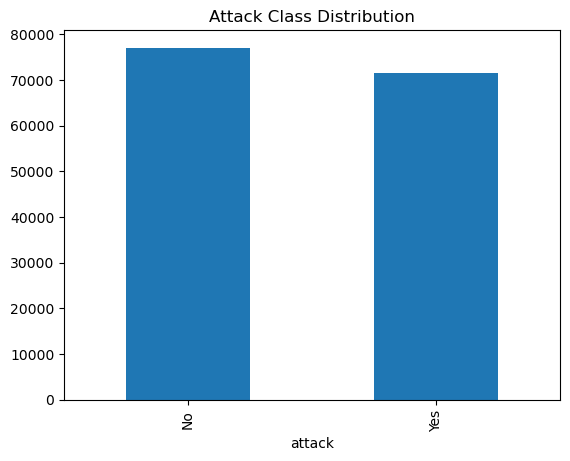

In [137]:
# Distribution of the target variable to see if dataset is imbalanced
df['attack'].value_counts().plot(kind='bar', title='Attack Class Distribution')

In [138]:
class_percentages = df['attack'].value_counts(normalize=True) * 100
print(class_percentages)

attack
No     51.882276
Yes    48.117724
Name: proportion, dtype: float64


In [139]:
class_ratio = df['attack'].value_counts().max() / df['attack'].value_counts().min()
print(f"Class ratio: {class_ratio}")


Class ratio: 1.078236290108168


## Univariate Analysis

### Numerical Features

array([[<Axes: title={'center': 'src_bytes'}>,
        <Axes: title={'center': 'dst_bytes'}>],
       [<Axes: title={'center': 'duration'}>, <Axes: >]], dtype=object)

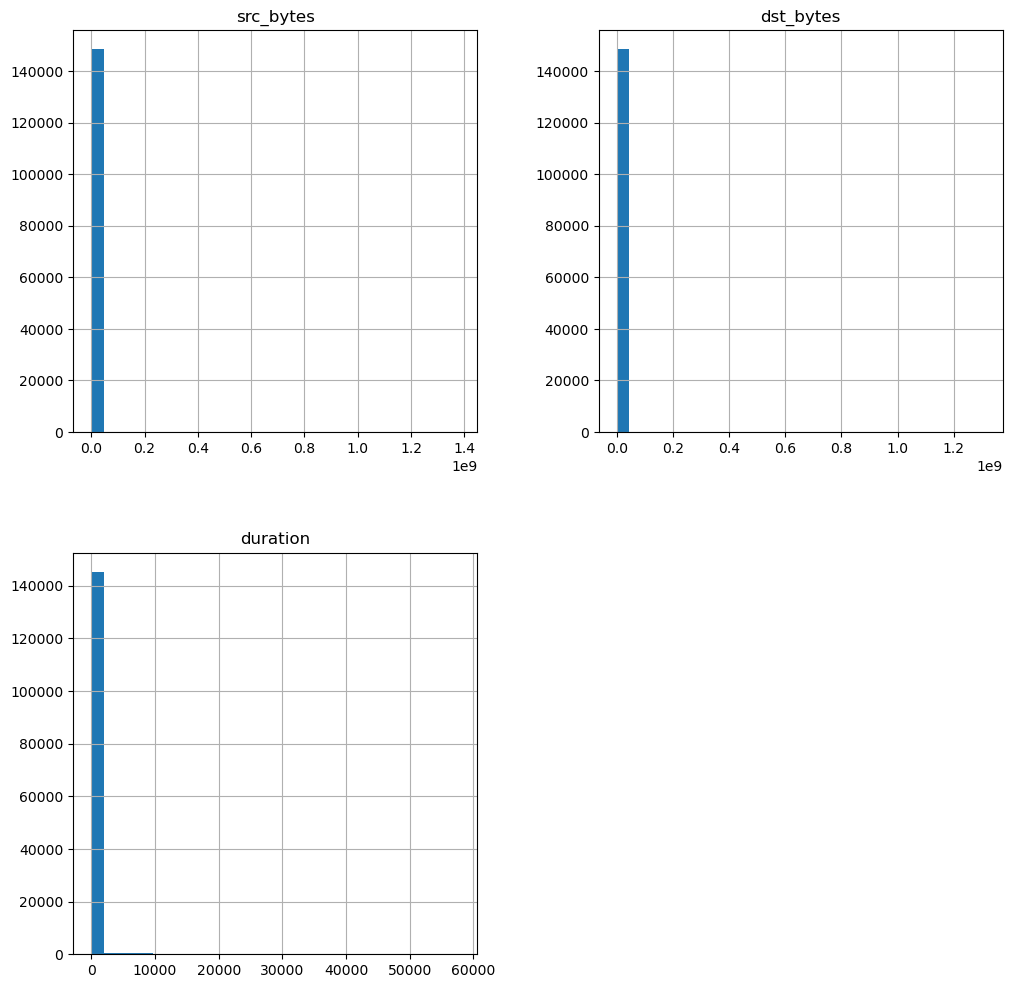

In [140]:
# Histograms for numerical features
df[['src_bytes', 'dst_bytes', 'duration']].hist(bins=30, figsize=(12, 12))


### Categorical Features

<Axes: title={'center': 'Protocol Type Distribution'}, xlabel='protocol_type'>

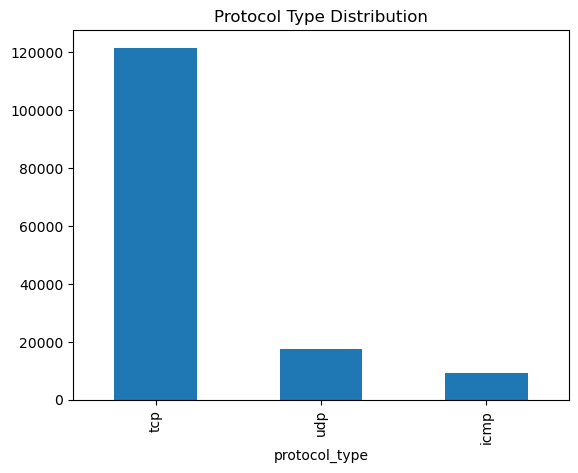

In [141]:
#Bar plot for protocol_type distribution
df['protocol_type'].value_counts().plot(kind='bar', title='Protocol Type Distribution')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]),
 [Text(0, 0, 'http'),
  Text(1, 0, 'private'),
  Text(2, 0, 'domain_u'),
  Text(3, 0, 'smtp'),
  Text(4, 0, 'ftp_data'),
  Text(5, 0, 'other'),
  Text(6, 0, 'eco_i'),
  Text(7, 0, 'telnet'),
  Text(8, 0, 'ecr_i'),
  Text(9, 0, 'ftp'),
  Text(10, 0, 'finger'),
  Text(11, 0, 'pop_3'),
  Text(12, 0, 'auth'),
  Text(13, 0, 'imap4'),
  Text(14, 0, 'Z39_50'),
  Text(15, 0, 'uucp'),
  Text(16, 0, 'courier'),
  Text(17, 0, 'bgp'),
  Text(18, 0, 'uucp_path'),
  Text(19, 0, 'iso_tsap'),
  Text(20, 0, 'whois'),
  Text(21, 0, 'time'),
  Text(22, 0, 'nnsp'),
  Text(23, 0, 'vmnet'),
  Text(24, 0, 'urp_i'),
  Text(25, 0, 'domain'),
  Text(26, 0, 'ctf'),
  Text(27, 0, 'csnet_ns'),
  Te

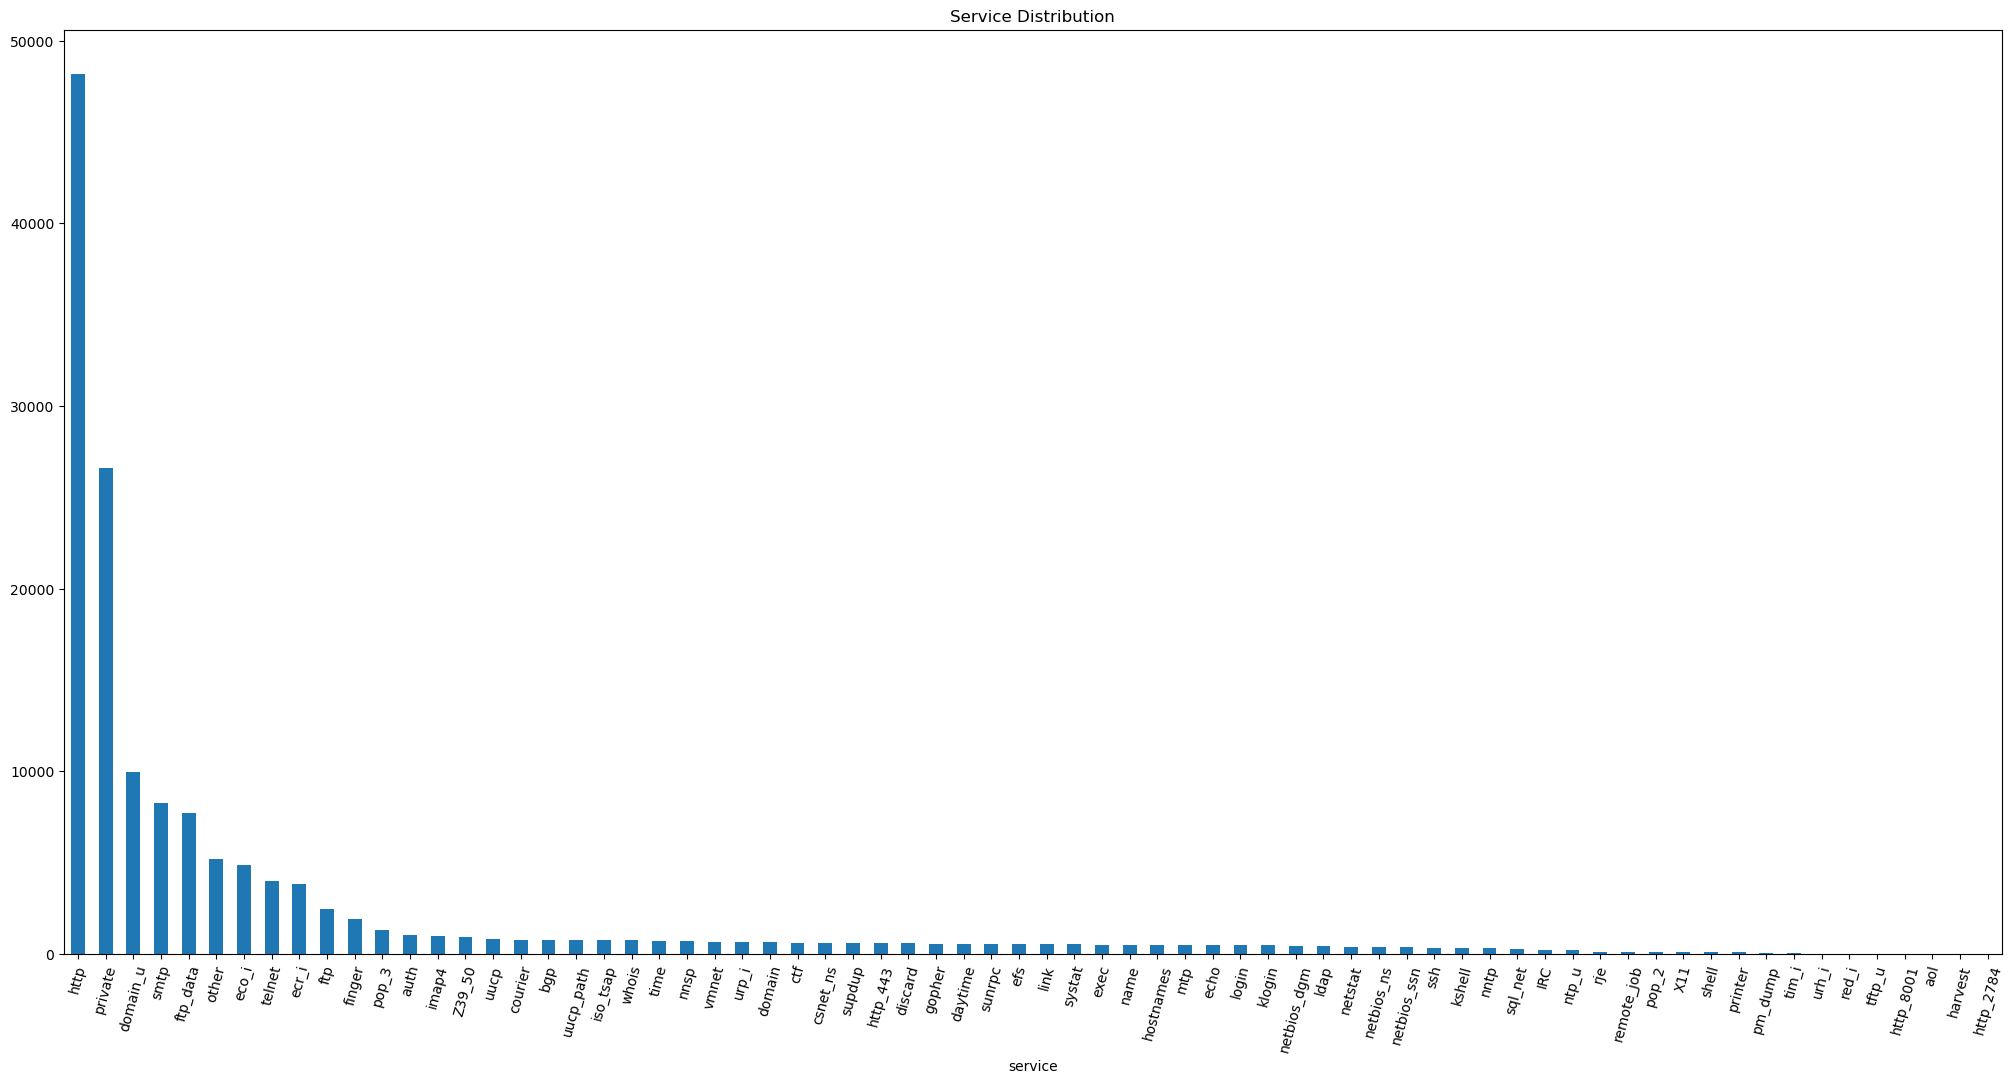

In [142]:
#Bar plot for service distribution
plt.figure(figsize=(25,12))
df['service'].value_counts().plot(kind='bar', title='Service Distribution')
plt.xticks(rotation=75)

<Axes: title={'center': 'Flag Distribution'}, xlabel='flag'>

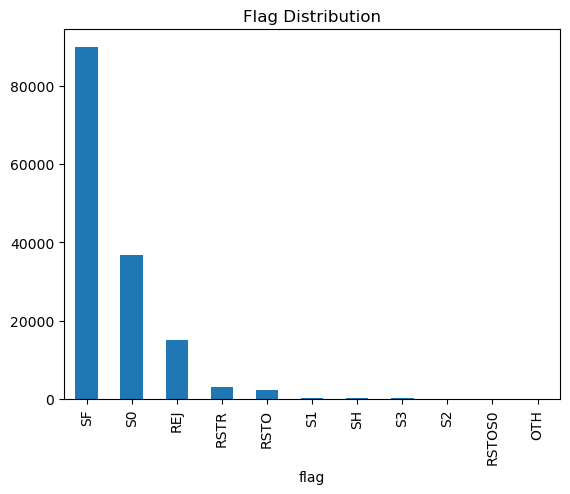

In [143]:
#Bar plot for flag distribution
df['flag'].value_counts().plot(kind='bar', title='Flag Distribution')

## Outlier Detection

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 [Text(1, 0, 'duration'),
  Text(2, 0, 'src_bytes'),
  Text(3, 0, 'dst_bytes'),
  Text(4, 0, 'land'),
  Text(5, 0, 'wrong_fragment'),
  Text(6, 0, 'urgent'),
  Text(7, 0, 'hot'),
  Text(8, 0, 'num_compromised'),
  Text(9, 0, 'count'),
  Text(10, 0, 'srv_count'),
  Text(11, 0, 'serror_rate'),
  Text(12, 0, 'rerror_rate'),
  Text(13, 0, 'same_srv_rate'),
  Text(14, 0, 'diff_srv_rate'),
  Text(15, 0, 'srv_diff_host_rate'),
  Text(16, 0, 'dst_host_count'),
  Text(17, 0, 'dst_host_srv_count'),
  Text(18, 0, 'dst_host_same_srv_rate'),
  Text(19, 0, 'dst_host_diff_srv_rate')])

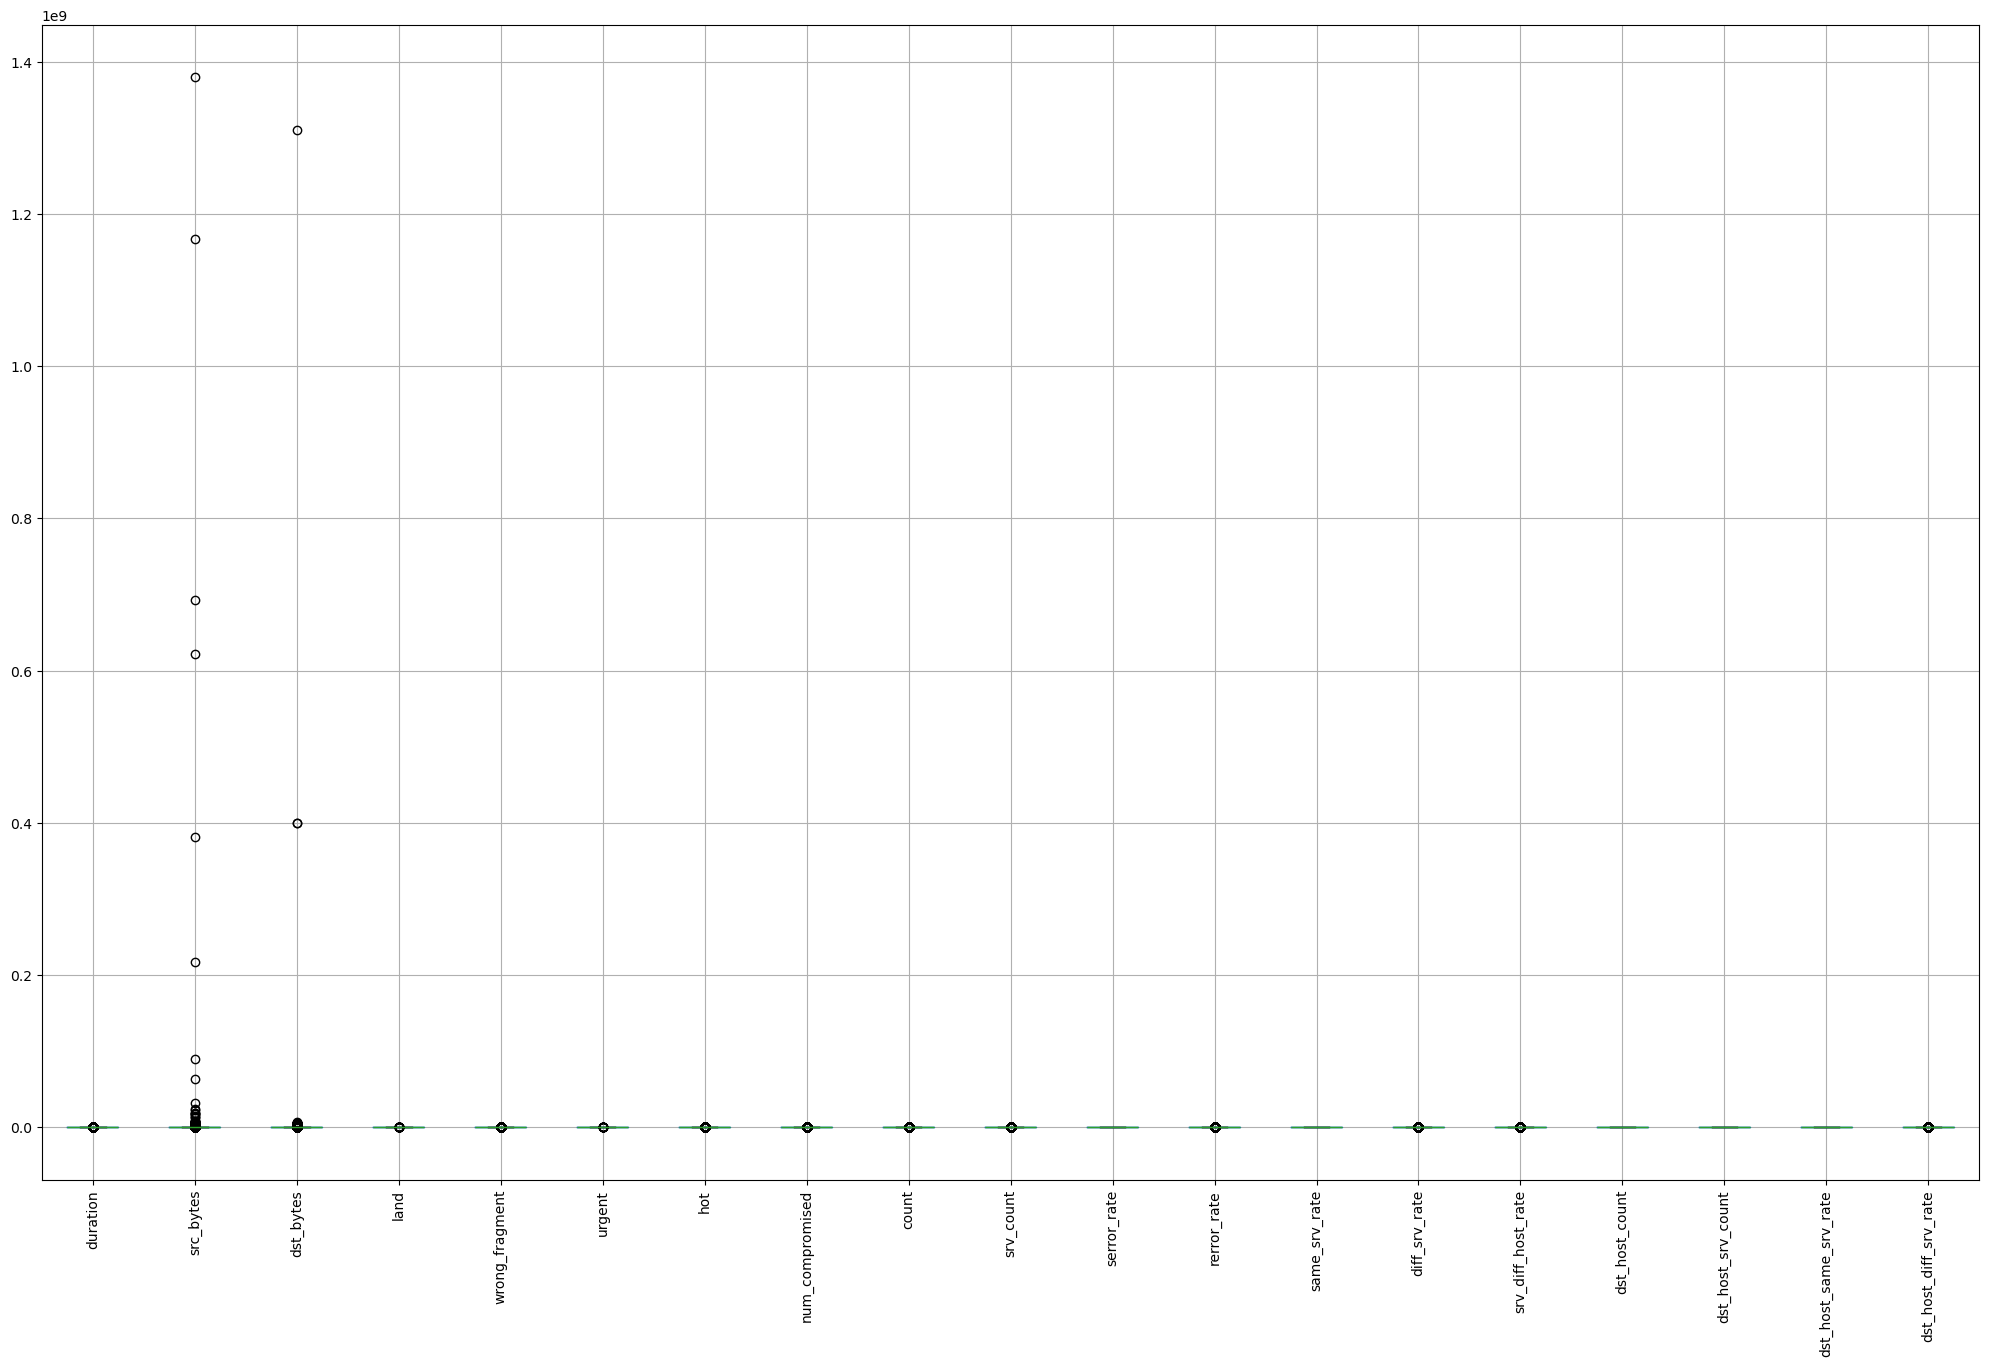

In [144]:
#Outlier Detection for src_bytes
df.boxplot(figsize=(25, 15))
plt.xticks(rotation=90)

## Multivariate Analysis

### Correlation Table

In [158]:
corr = df.select_dtypes(include=['number']).corr()
corr

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_compromised,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate
duration,1.000000,0.068959,0.034056,-0.001651,-0.009616,0.002426,0.000664,0.043998,-0.078091,-0.039094,-0.064628,0.164661,0.074720,-0.017784,-0.039485,0.050311,-0.098013,-0.104631,0.223635
src_bytes,0.068959,1.000000,0.000212,-0.000109,-0.000633,-0.000074,0.000347,-0.000079,-0.004796,-0.002609,-0.002785,0.011591,0.003634,-0.000637,-0.002500,-0.005586,-0.006663,-0.006312,0.000730
dst_bytes,0.034056,0.000212,1.000000,-0.000068,-0.000394,0.000179,-0.000297,0.001253,-0.003226,-0.001611,-0.002665,0.009446,0.003450,-0.001588,-0.001553,0.002225,-0.003977,-0.004168,0.009834
land,-0.001651,-0.000109,-0.000068,1.000000,-0.001255,-0.000153,-0.001381,-0.000168,-0.010042,-0.005144,0.024544,-0.005061,0.009253,-0.002565,0.040548,-0.024564,-0.015214,0.009425,-0.004612
wrong_fragment,-0.009616,-0.000633,-0.000394,-0.001255,1.000000,-0.000889,-0.008042,-0.000981,-0.019921,0.021143,-0.038162,-0.034368,0.051176,-0.025896,-0.022829,0.032552,-0.046659,-0.046590,0.051988
urgent,0.002426,-0.000074,0.000179,-0.000153,-0.000889,1.000000,0.008151,0.029034,-0.007336,-0.003762,-0.006188,-0.004228,0.007793,-0.003621,-0.003916,-0.011494,-0.009655,-0.003882,0.007248
hot,0.000664,0.000347,-0.000297,-0.001381,-0.008042,0.008151,1.000000,0.002582,-0.066004,-0.033403,-0.054440,-0.034769,0.066636,-0.017705,-0.026141,-0.012182,-0.051125,-0.036210,-0.009751
num_compromised,0.043998,-0.000079,0.001253,-0.000168,-0.000981,0.029034,0.002582,1.000000,-0.008060,-0.004126,-0.004808,-0.004053,0.008546,-0.003957,-0.004141,-0.011188,-0.010329,-0.005224,0.002618
count,-0.078091,-0.004796,-0.003226,-0.010042,-0.019921,-0.007336,-0.066004,-0.008060,1.000000,0.491522,0.410496,0.201805,-0.616403,0.233640,-0.256859,0.446913,-0.382076,-0.458138,0.198272
srv_count,-0.039094,-0.002609,-0.001611,-0.005144,0.021143,-0.003762,-0.033403,-0.004126,0.491522,1.000000,-0.135278,-0.114488,0.185365,-0.107297,-0.079083,0.147698,0.208167,0.187863,-0.108733


### Correlation Heatmap

<Axes: >

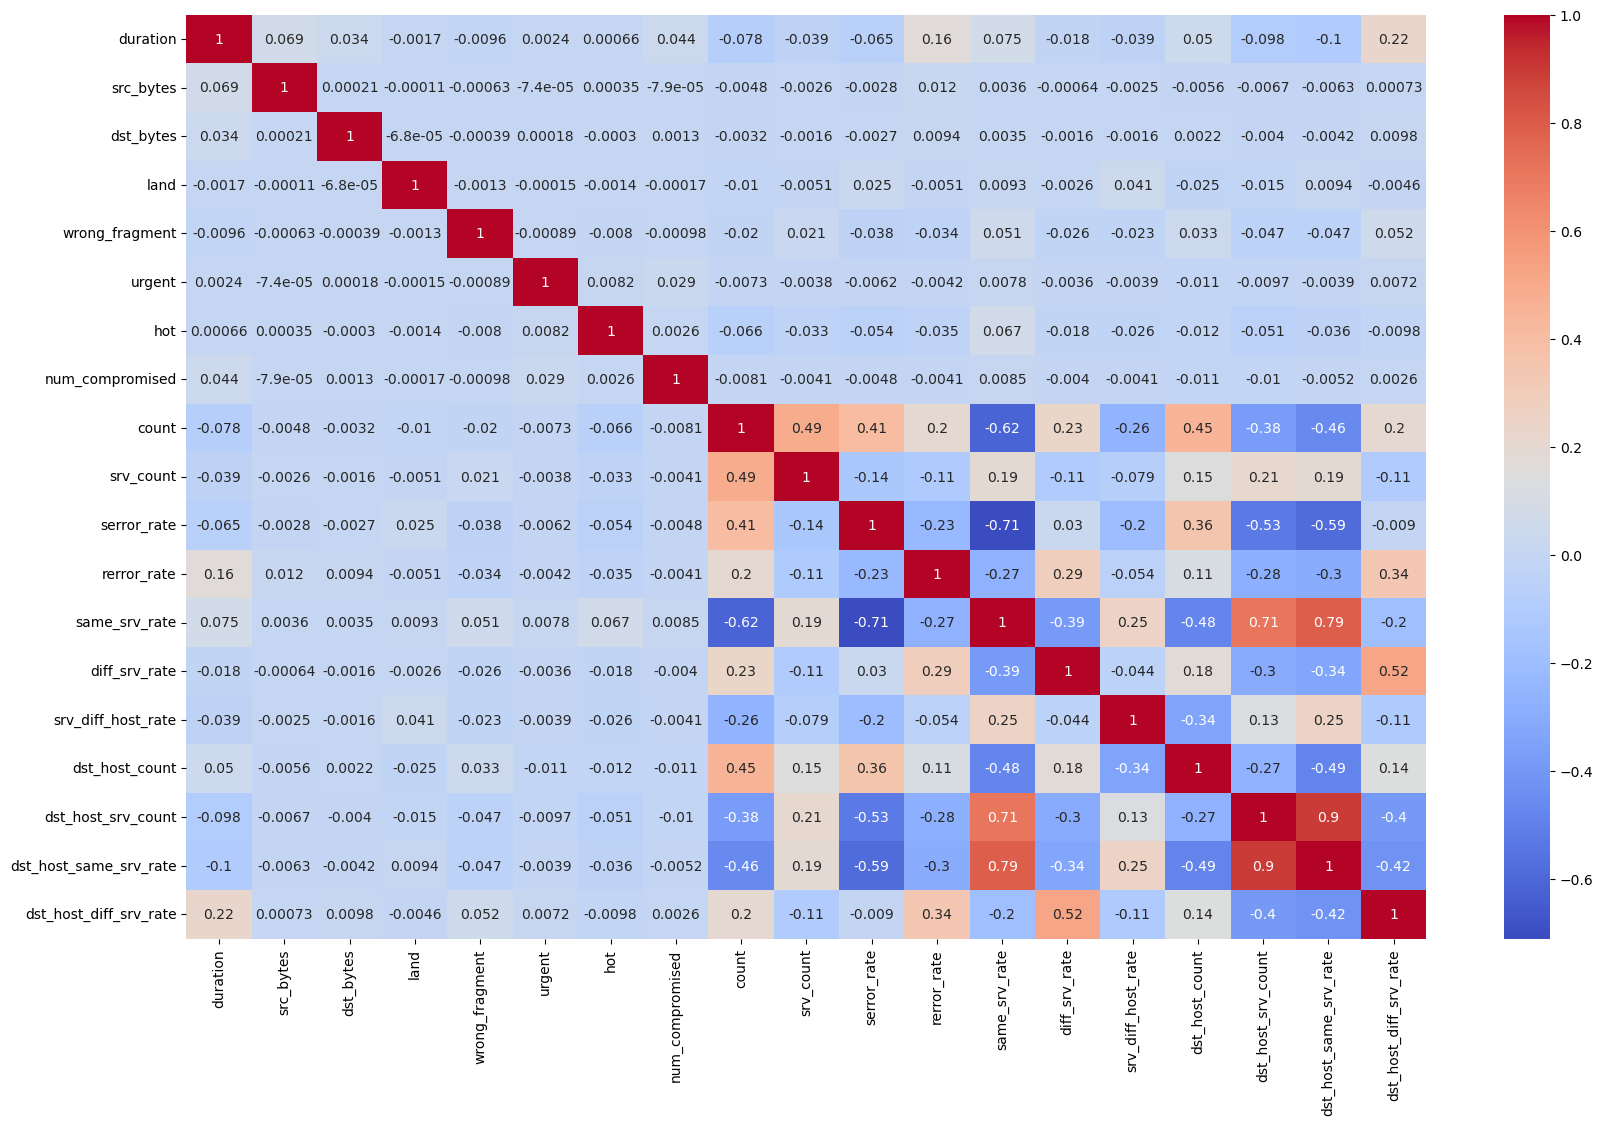

In [162]:
#Heatmap showing relationships between numerical features
plt.figure(figsize=(20,12))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')

### Scatter Plot

#### src_bytes vs dst_bytes

<Axes: xlabel='src_bytes', ylabel='dst_bytes'>

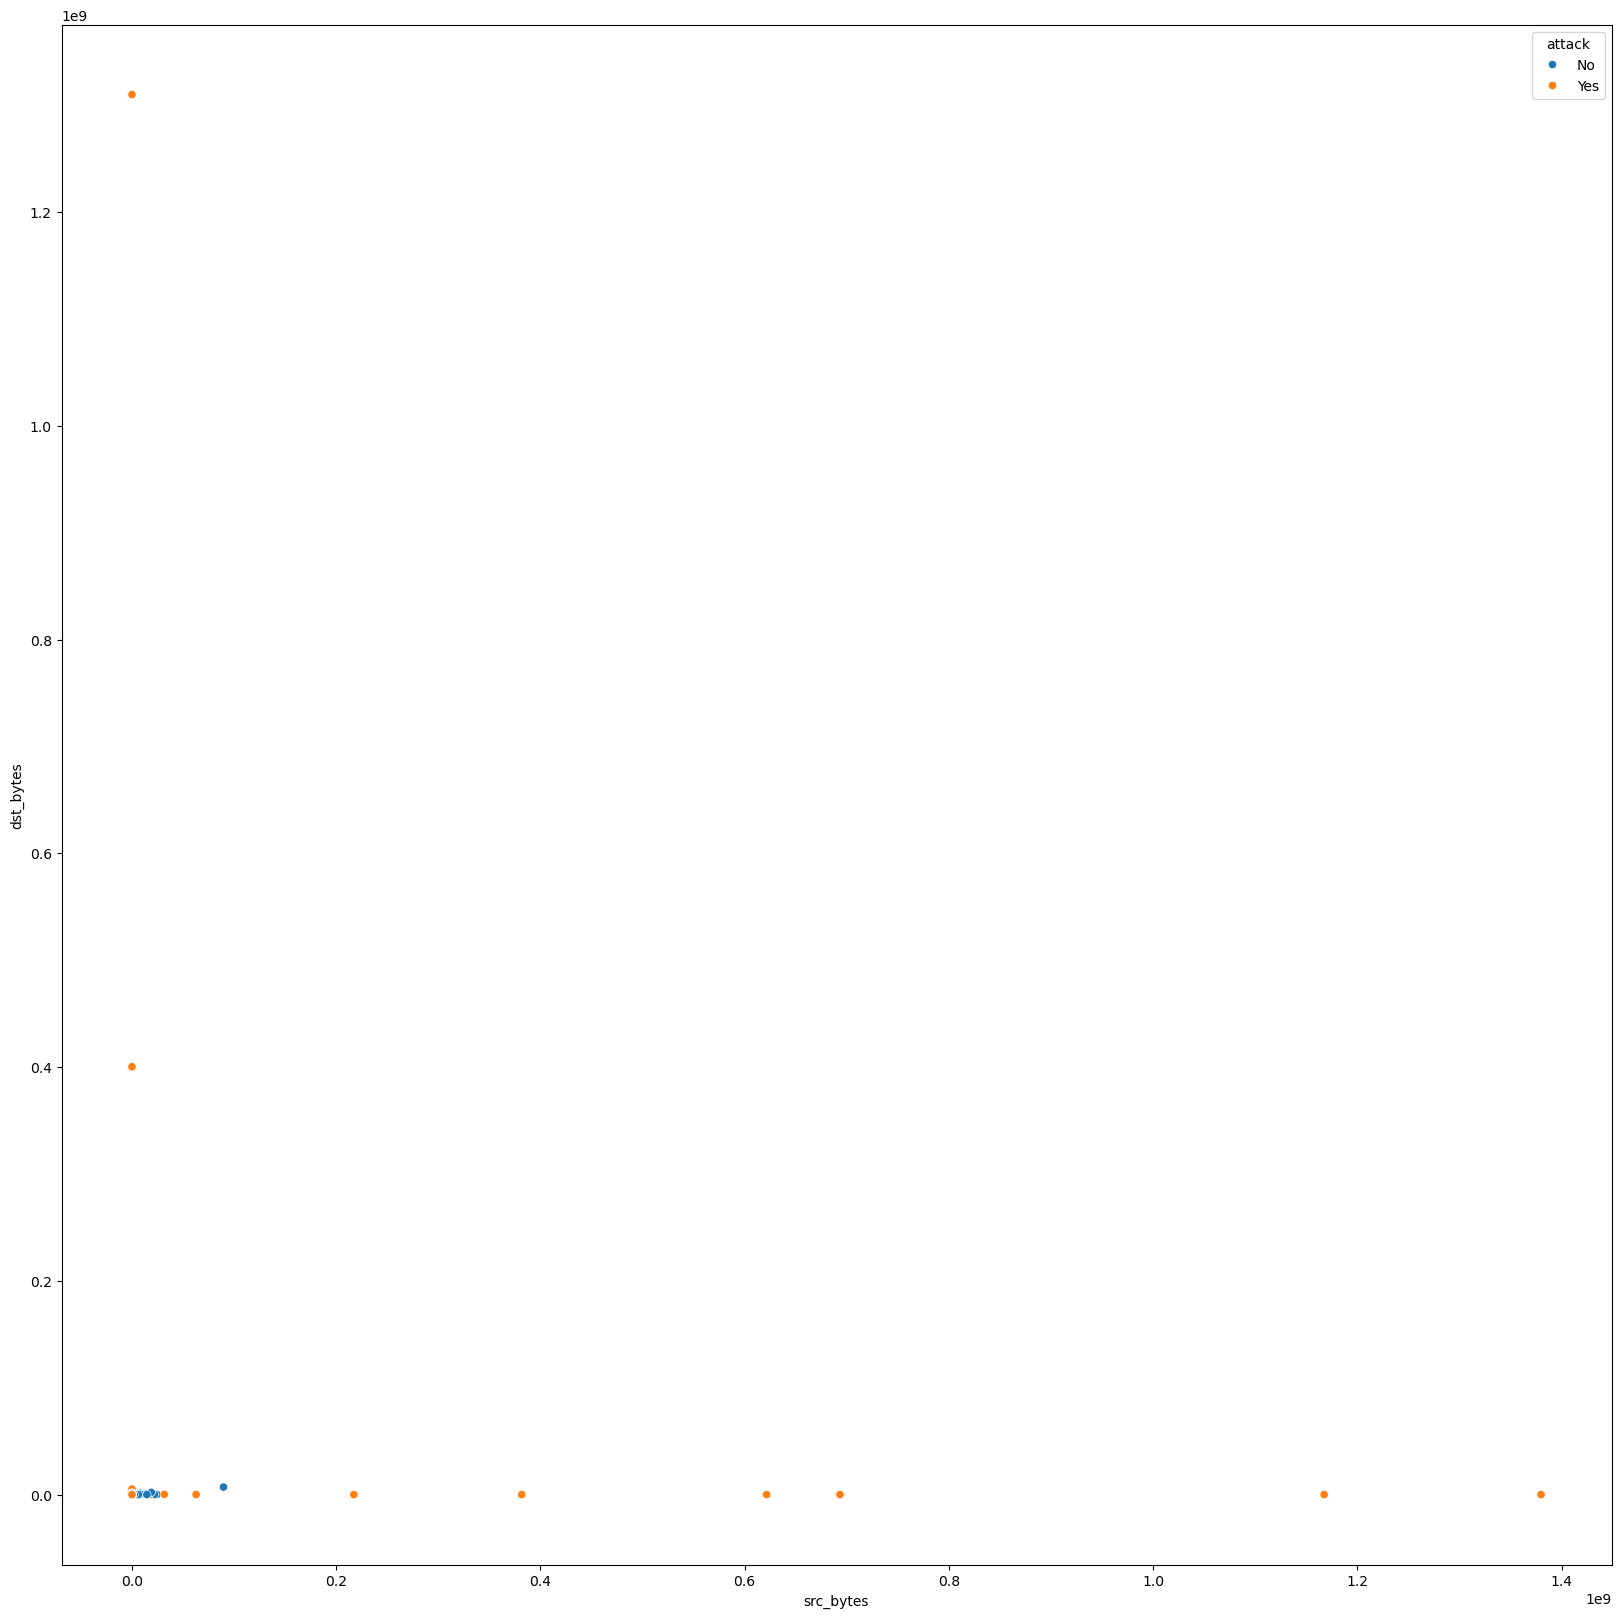

In [146]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=df, x='src_bytes', y='dst_bytes', hue='attack')

<Axes: xlabel='src_bytes', ylabel='dst_bytes'>

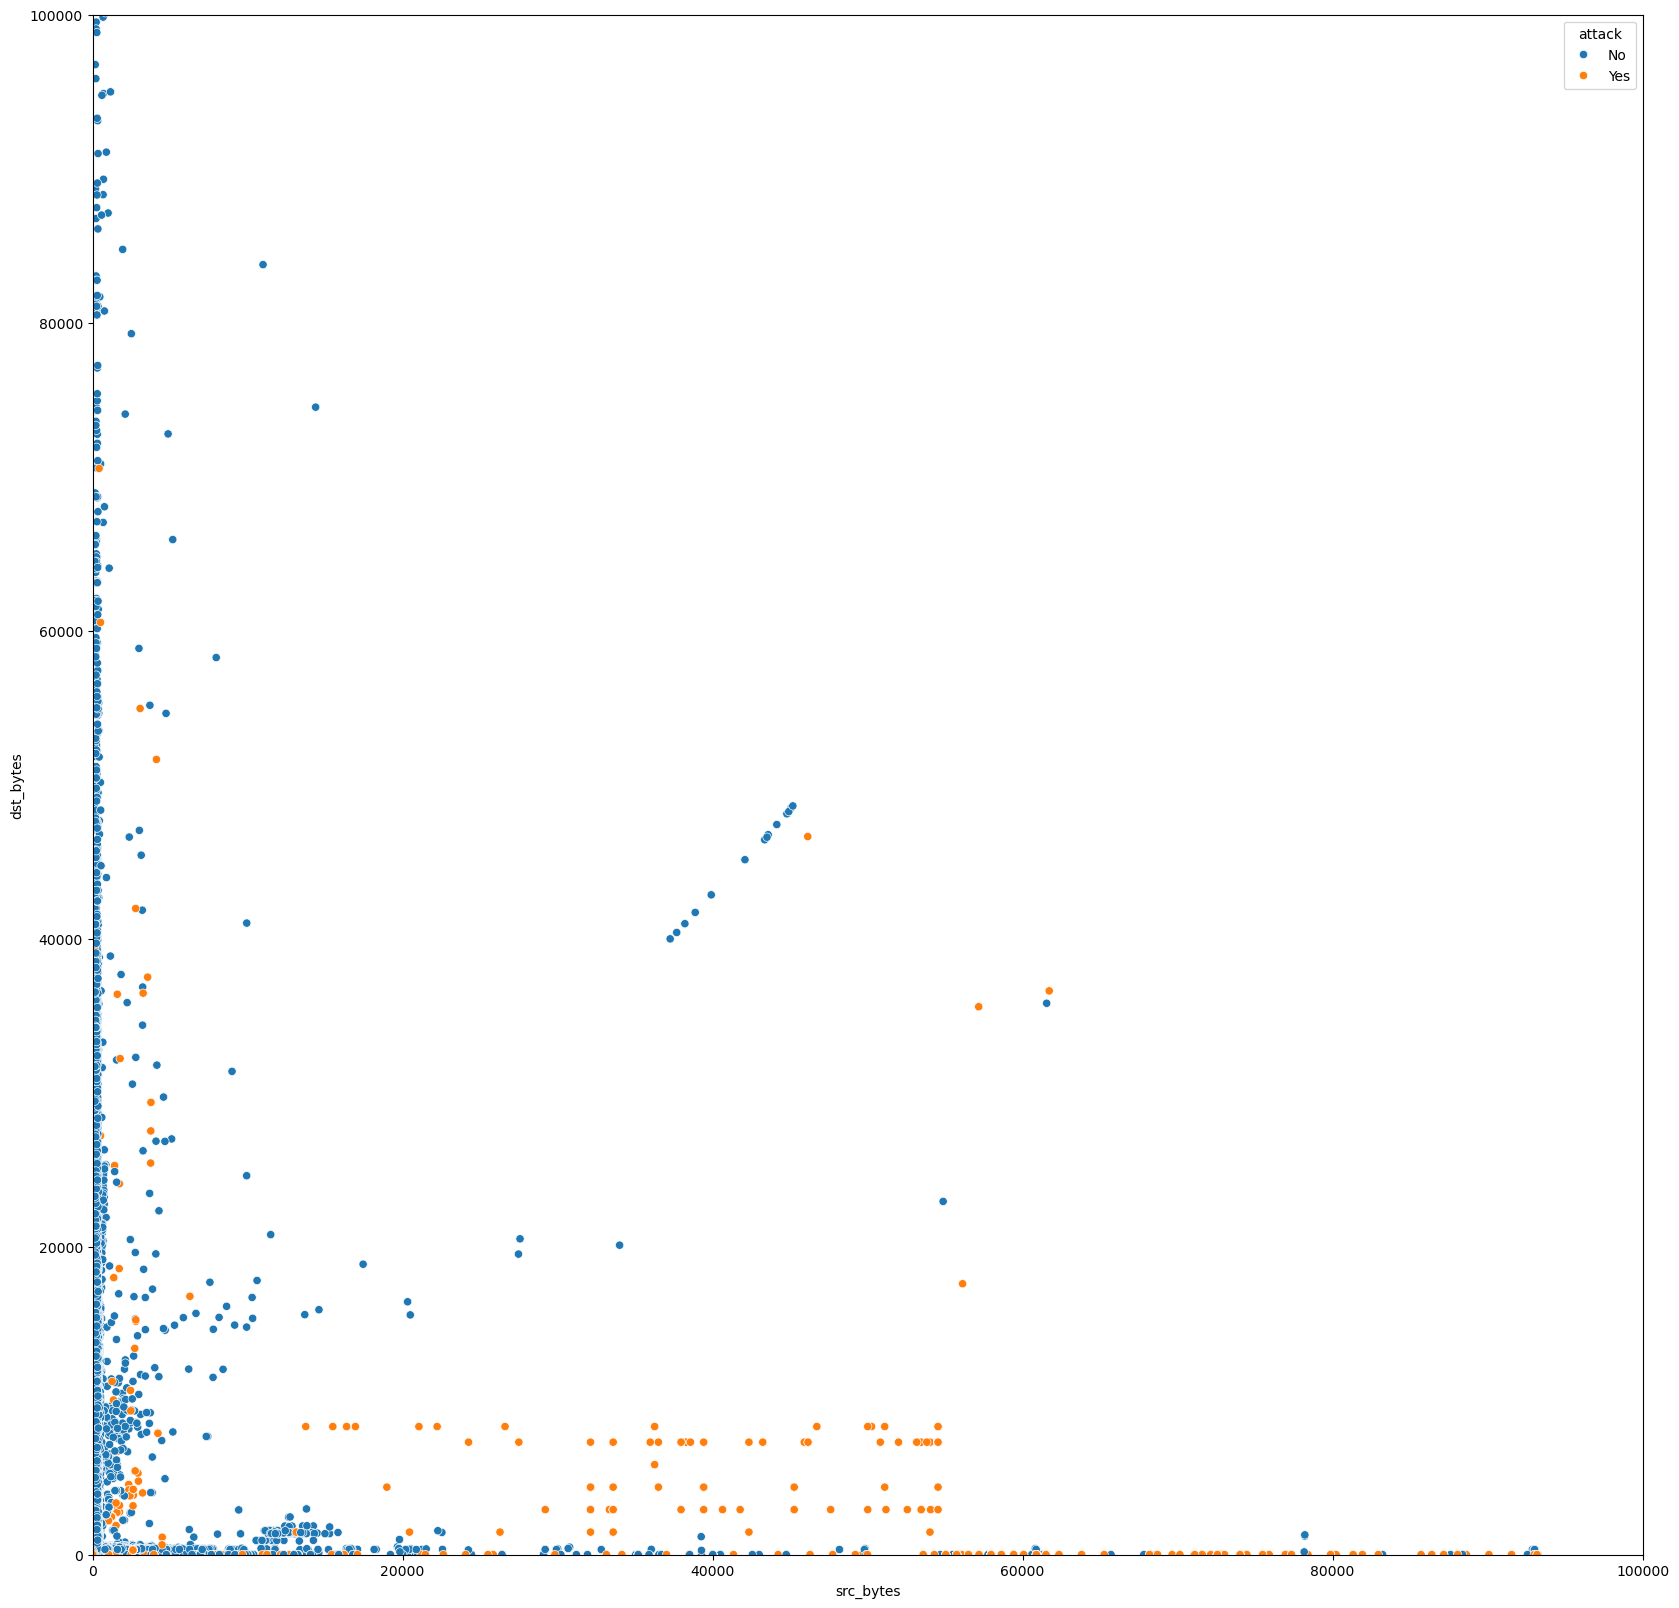

In [147]:
#Scatter Plot (src_bytes vs dst_bytes) on a smaller scale
plt.figure(figsize=(20,20))
plt.ylim(0, 100000)
plt.xlim(0,100000)
sns.scatterplot(data=df, x='src_bytes', y='dst_bytes', hue='attack')


<Axes: xlabel='src_bytes', ylabel='dst_bytes'>

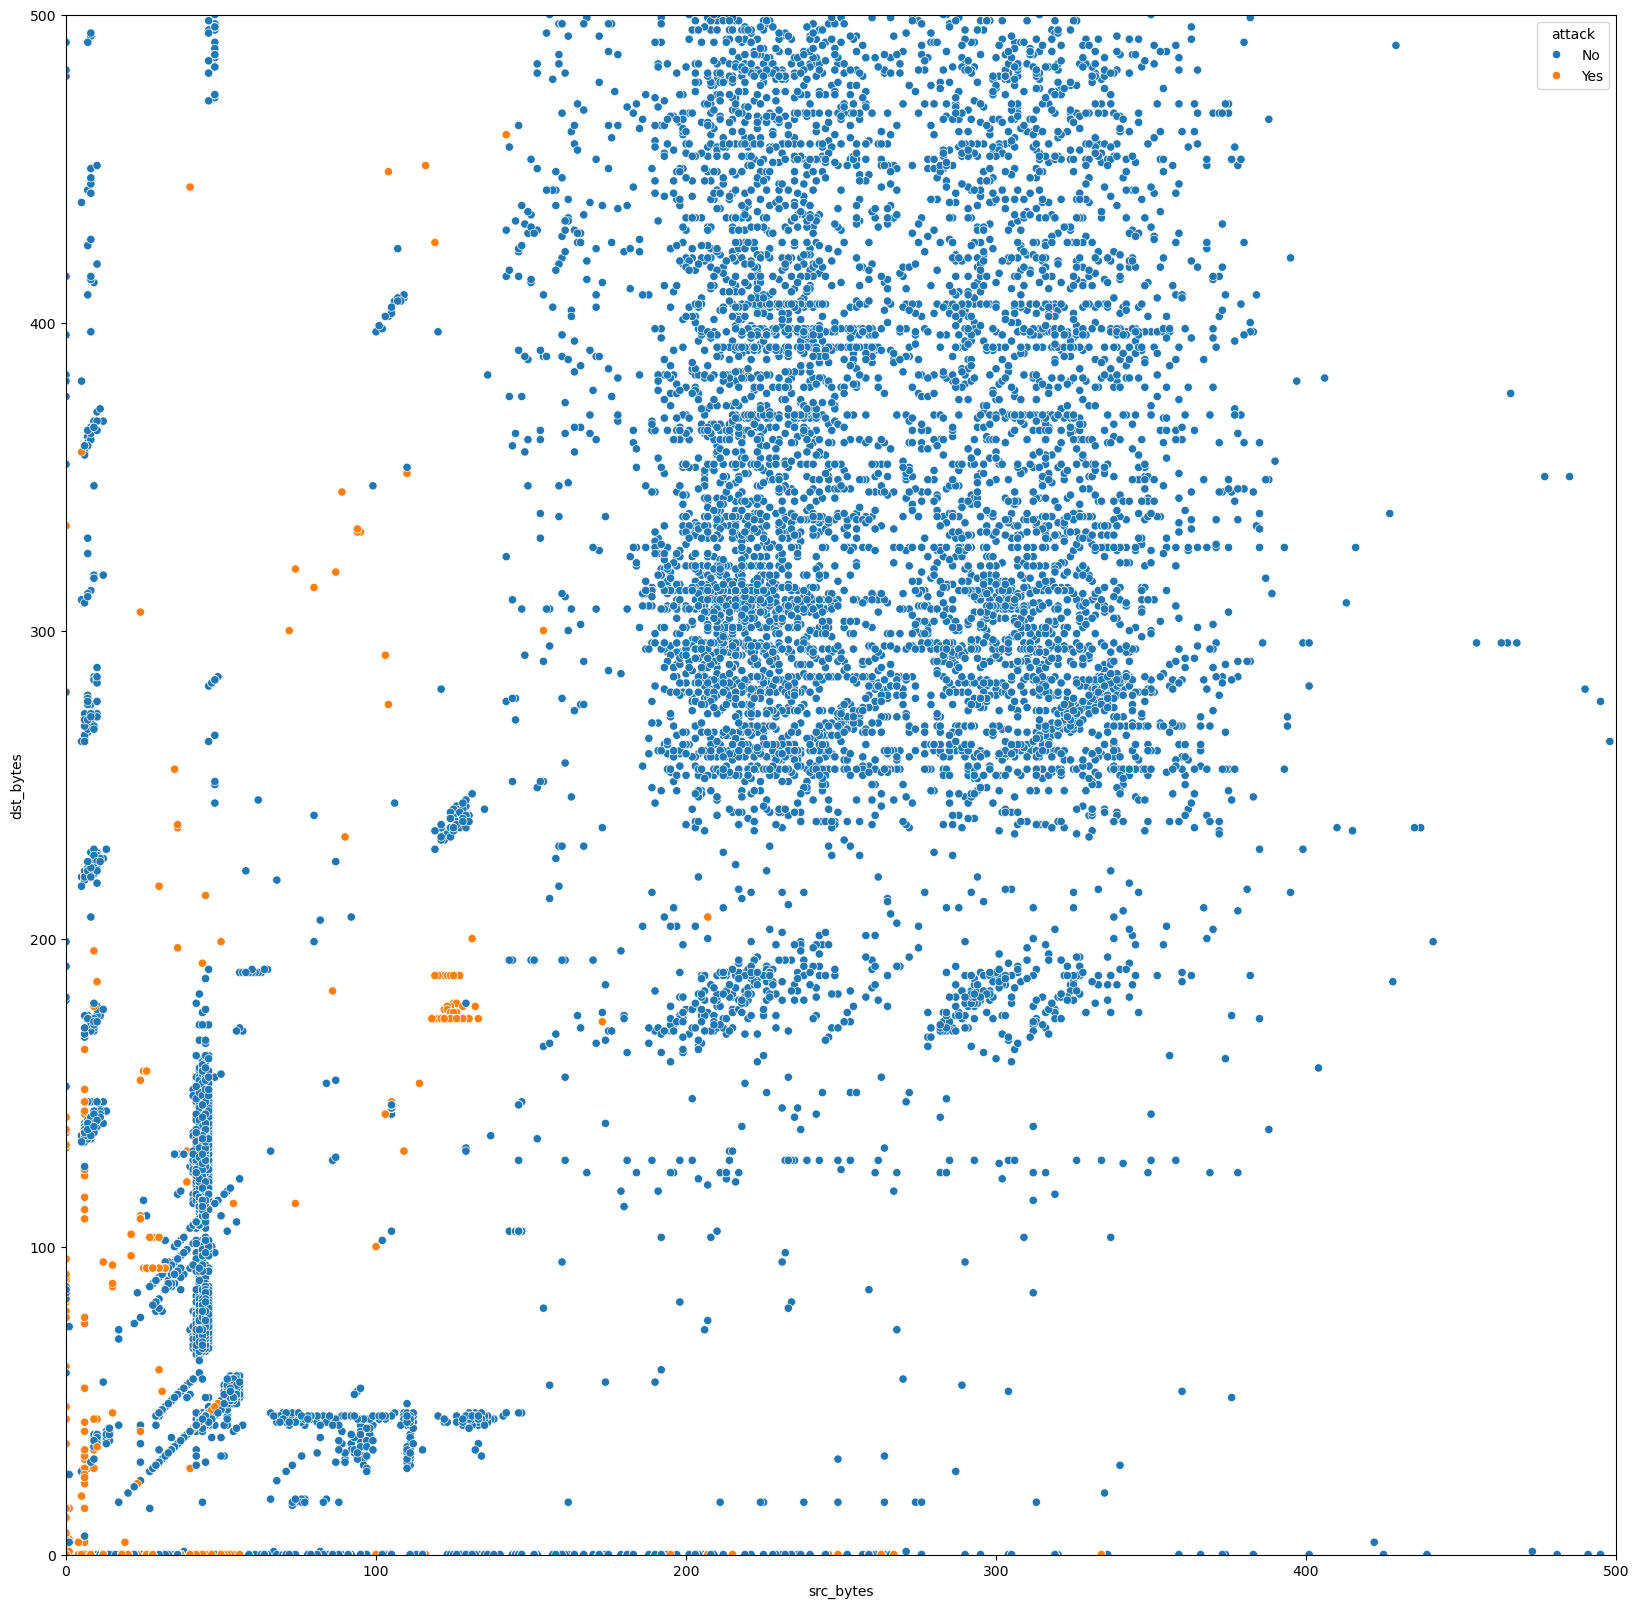

In [148]:
#Scatter Plot (src_bytes vs dst_bytes) on an even smaller scale
plt.figure(figsize=(20,20))
plt.ylim(0,500)
plt.xlim(0,500)
sns.scatterplot(data=df, x='src_bytes', y='dst_bytes', hue='attack')


#### src_bytes vs duration

<Axes: xlabel='src_bytes', ylabel='duration'>

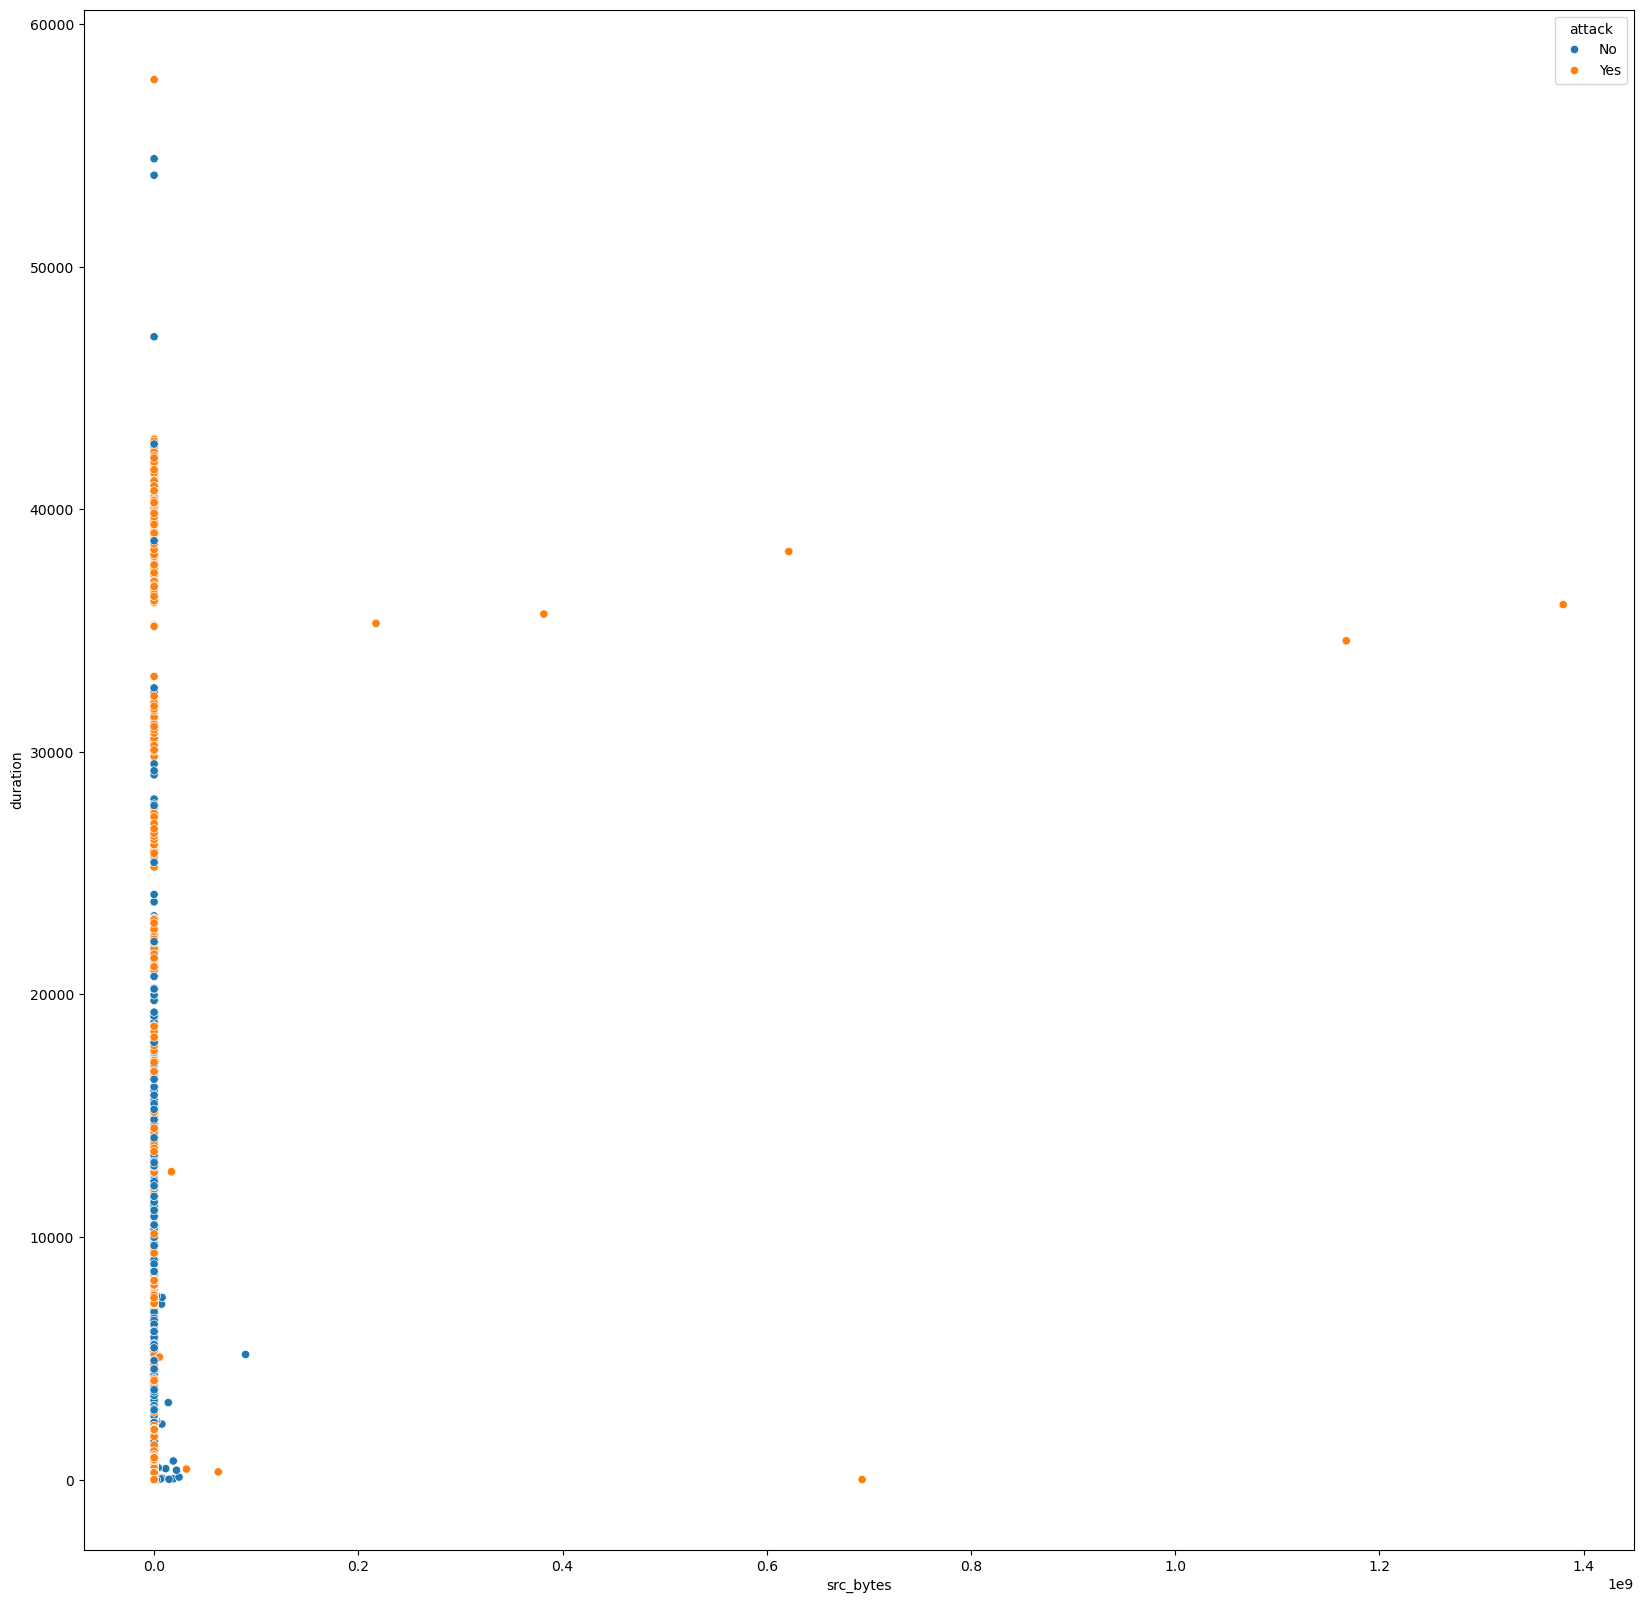

In [149]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=df, x='src_bytes', y='duration', hue='attack')

<Axes: xlabel='src_bytes', ylabel='duration'>

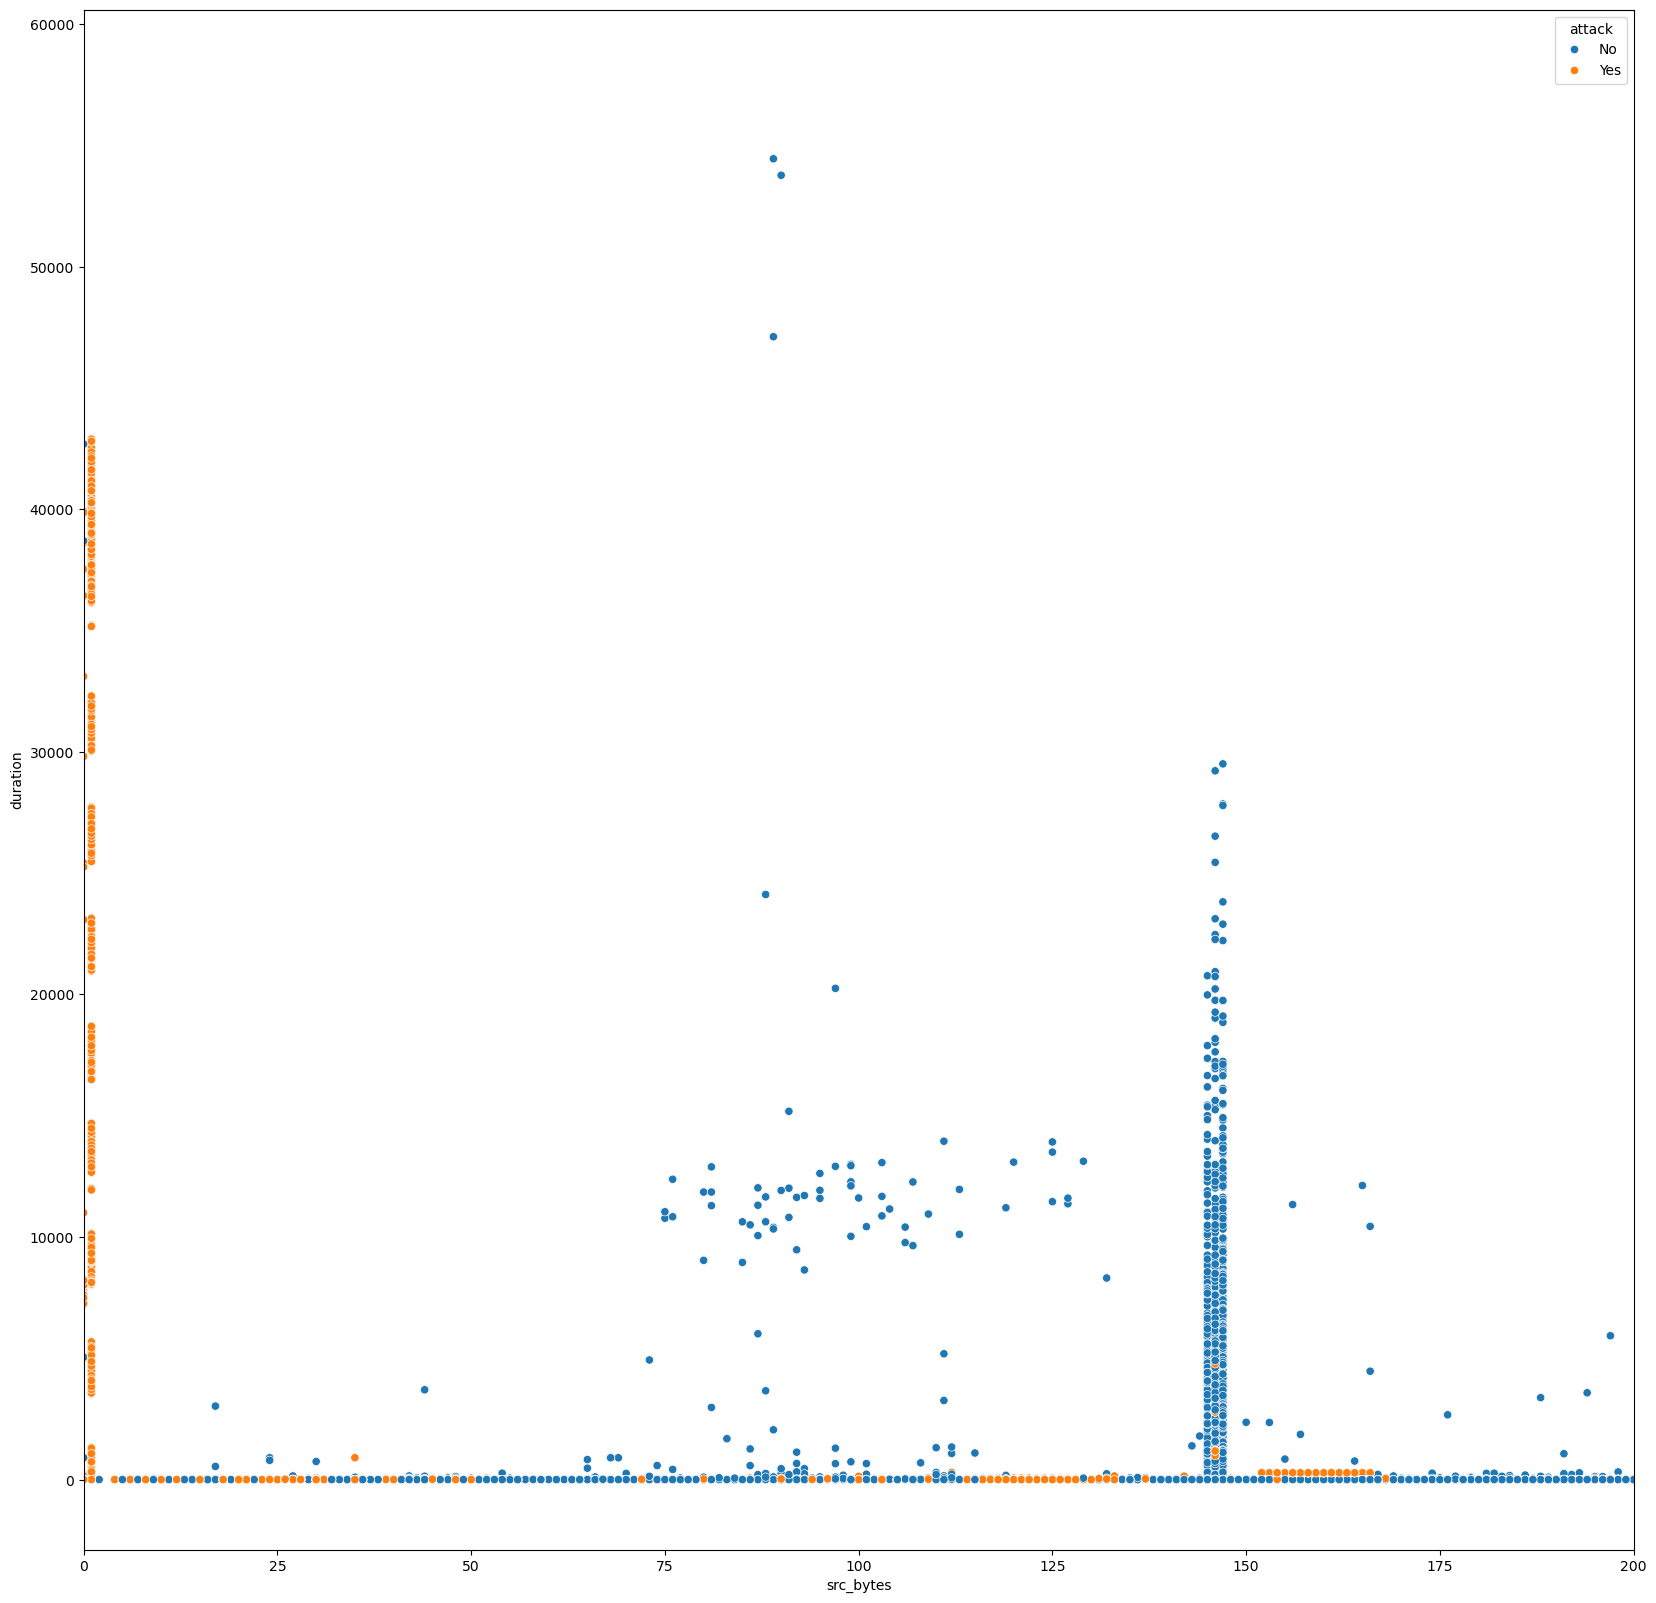

In [150]:
#Distibution on a smaller scale (src_bytes vs duration)
plt.figure(figsize=(20,20))
plt.xlim(0, 200)
sns.scatterplot(data=df, x='src_bytes', y='duration', hue='attack')

#### dst_bytes vs duration

<Axes: xlabel='dst_bytes', ylabel='duration'>

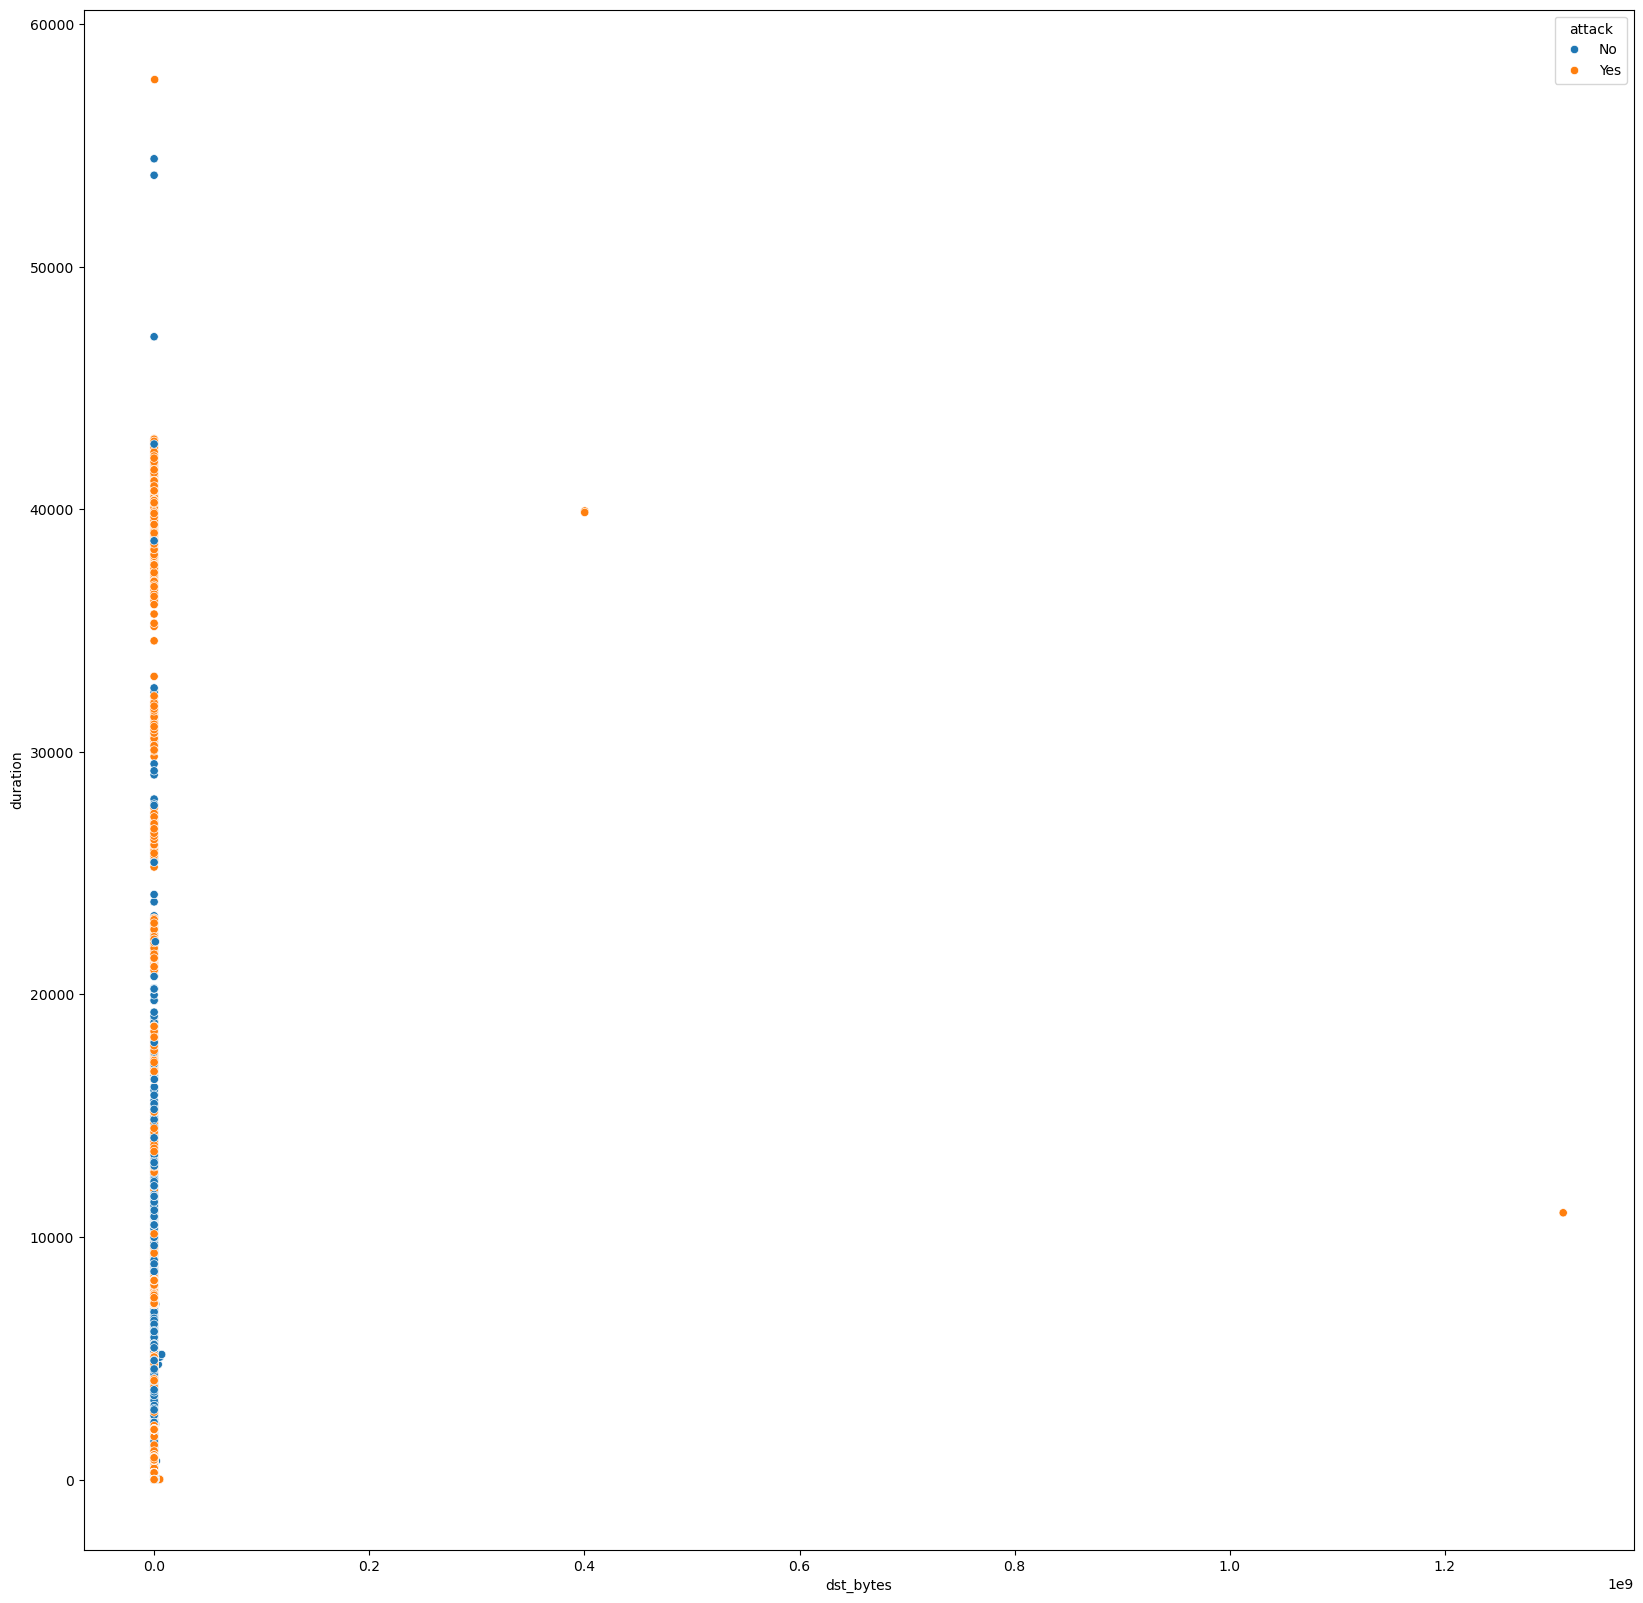

In [151]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=df, x='dst_bytes', y='duration', hue='attack')

<Axes: xlabel='dst_bytes', ylabel='duration'>

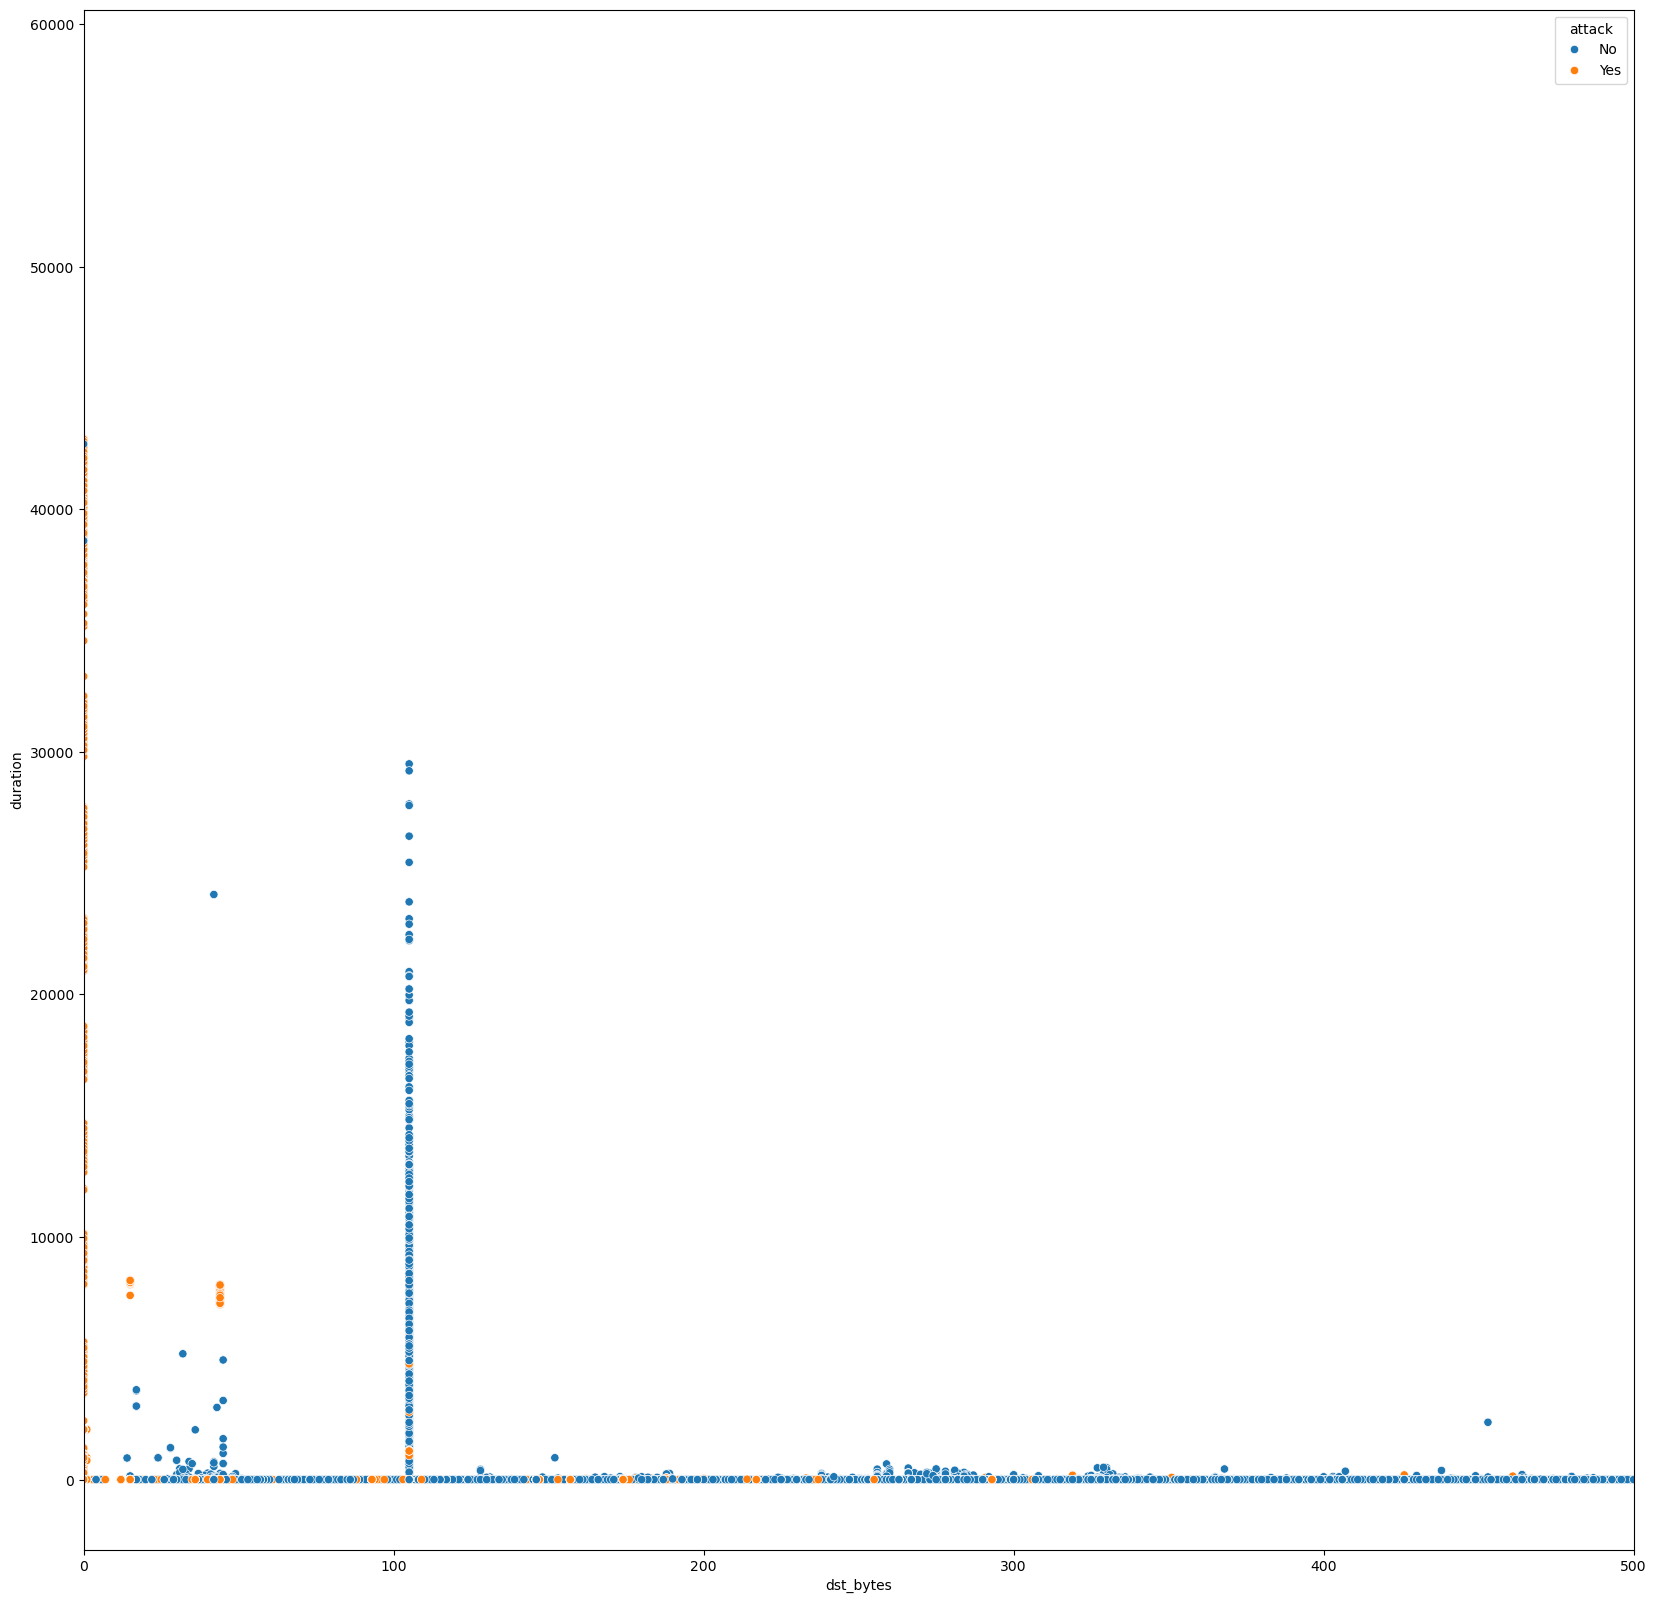

In [152]:
#Distribution on a smaller scale (dst_bytes vs duration)
plt.figure(figsize=(20,20))
plt.xlim(0, 500)
sns.scatterplot(data=df, x='dst_bytes', y='duration', hue='attack')

C:\Users\notsa\AppData\Local\Temp\ipykernel_78516\1562246810.py:3: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(0, 0)


<Axes: xlabel='dst_bytes', ylabel='duration'>

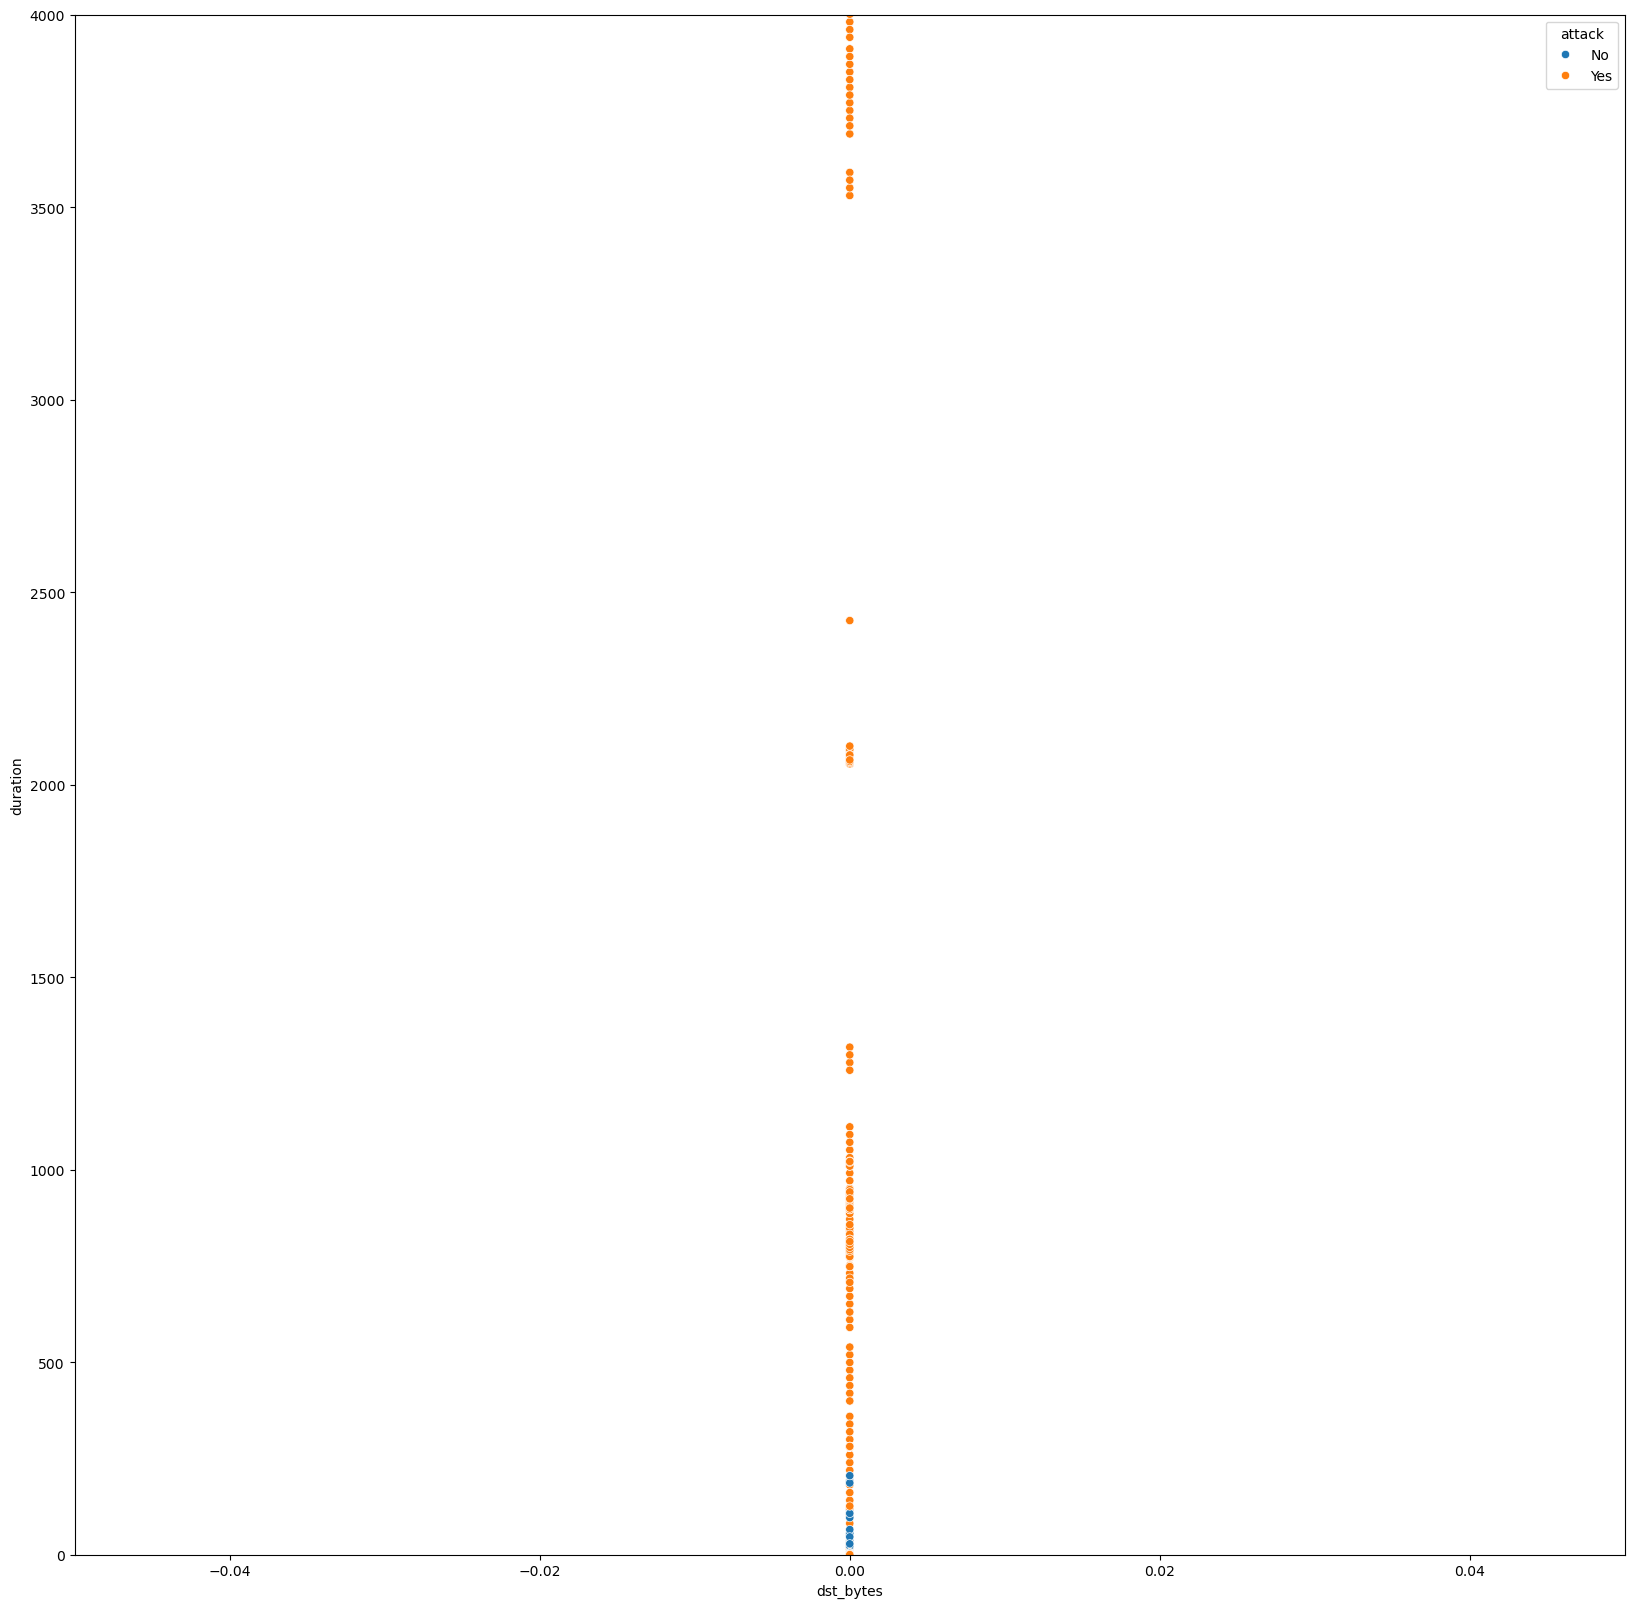

In [153]:
#Distribution on a smaller scale (dst_bytes vs duration)
plt.figure(figsize=(20,20))
plt.xlim(0, 0)
plt.ylim(0,4000)
sns.scatterplot(data=df, x='dst_bytes', y='duration', hue='attack')

## Relationship Between Features

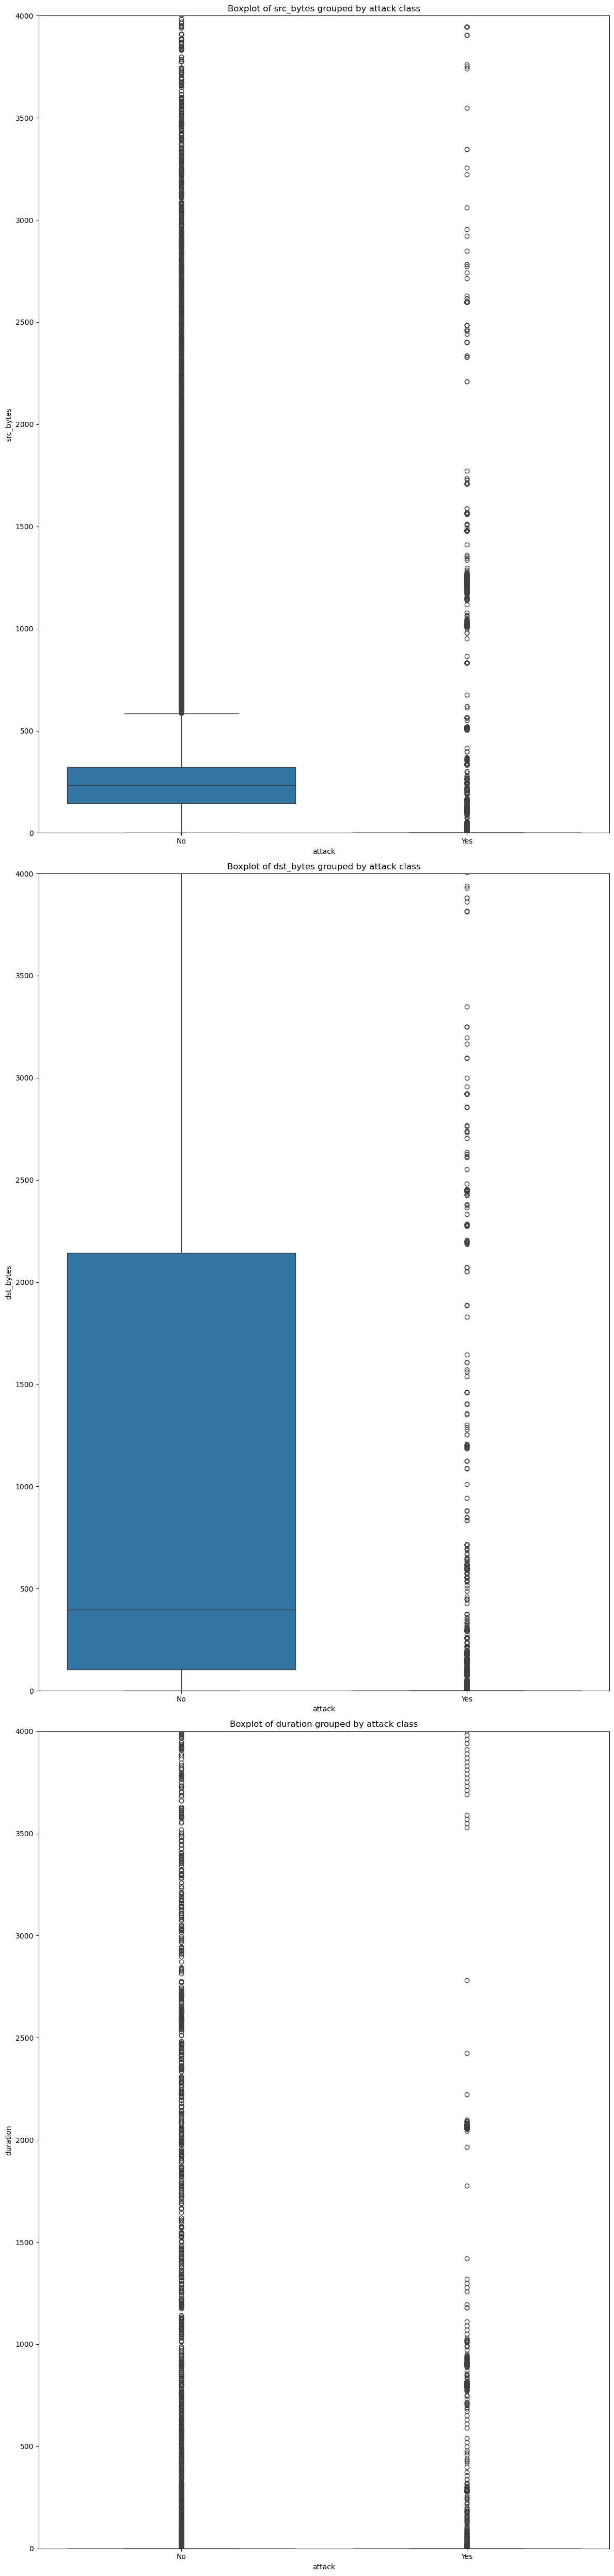

In [154]:
#Boxplot comparing feature distribution based on 'attack' variable
numerical_features = ['src_bytes', 'dst_bytes', 'duration'] 

fig, axes = plt.subplots(len(numerical_features), 1, figsize=(12,50))

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x='attack', y=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} grouped by attack class')
    axes[i].set_ylim(0, 4000)  

plt.tight_layout()
plt.show()

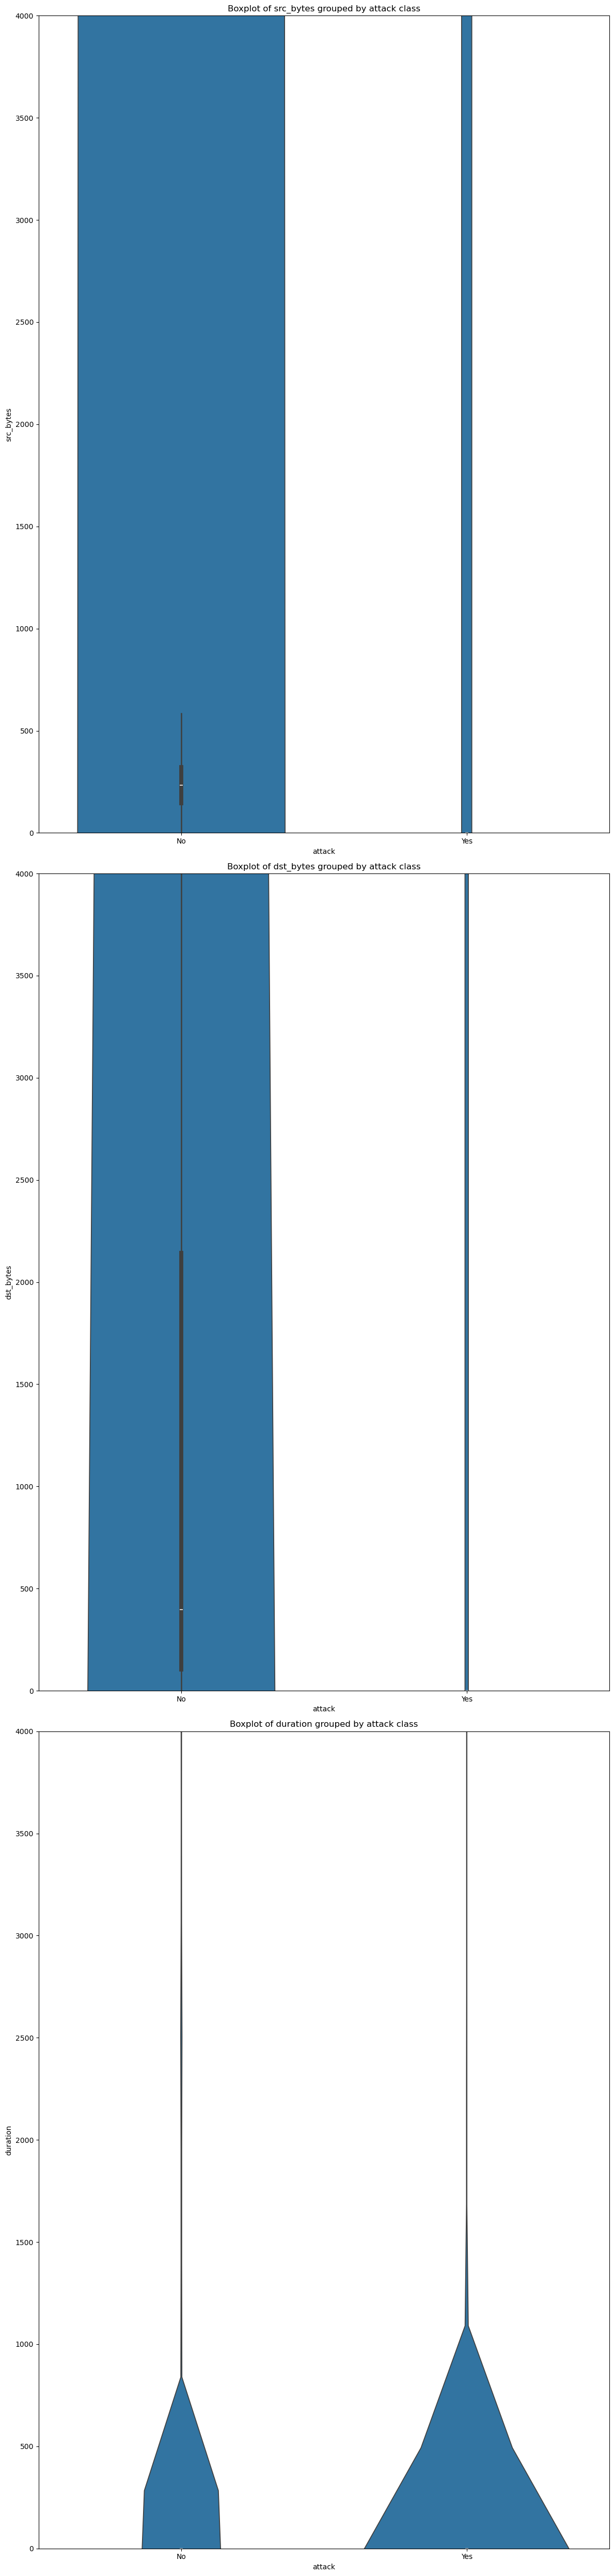

In [155]:
#Violinplot comparing feature distribution based on 'attack' variable
numerical_features = ['src_bytes', 'dst_bytes', 'duration'] 

fig, axes = plt.subplots(len(numerical_features), 1, figsize=(12,50))

for i, feature in enumerate(numerical_features):
    sns.violinplot(data=df, x='attack', y=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} grouped by attack class')
    axes[i].set_ylim(0, 4000)  

plt.tight_layout()
plt.show()

## Pairwise Relationships

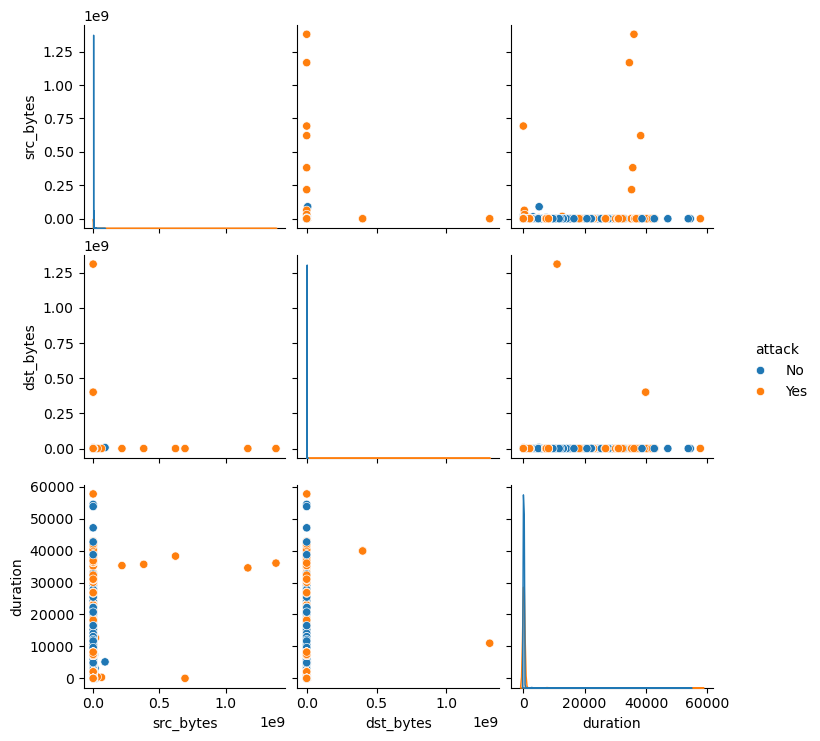

In [156]:
sns.pairplot(df, vars=['src_bytes', 'dst_bytes', 'duration'], hue='attack', diag_kind='kde')
